# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [4]:
# Importing the file porter_data_1.csv

df = pd.read_csv('porter_data_1.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [6]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [13]:
# Convert categorical features to category type

category_marketid = pd.get_dummies(df['market_id'], drop_first = True).astype(int)
#df = pd.concat([df, category_marketid], axis = 1)

ivalue = 'market_id'
category_marketid.columns = [
    (lambda col: f"{ivalue}_{int(col)}" )(col)
    for col in category_marketid.columns
]

category_marketid.head()

market_id_2  market_id_3  market_id_4  market_id_5  market_id_6
0            0            0            0            0            0
1            1            0            0            0            0
2            1            0            0            0            0
3            0            0            0            0            0
4            0            0            0            0            0

In [15]:
def generate_custom_dummy_columns(df_ctg, column_name):
    dummies = pd.get_dummies(df_ctg[column_name], drop_first=True).astype(int)
    dummies.columns = [f"{column_name}_{int(col)}" for col in dummies.columns]
    return dummies


In [17]:
dc_market_id = generate_custom_dummy_columns(df, 'market_id')
dc_store_primary_category = generate_custom_dummy_columns(df, 'store_primary_category') # it starts from 0
dc_order_protocol = generate_custom_dummy_columns(df, 'order_protocol')

print(dc_market_id.columns)
print(dc_store_primary_category.columns)
print(dc_order_protocol.columns)

Index(['market_id_2', 'market_id_3', 'market_id_4', 'market_id_5',
       'market_id_6'],
      dtype='object')
Index(['store_primary_category_1', 'store_primary_category_2',
       'store_primary_category_3', 'store_primary_category_4',
       'store_primary_category_5', 'store_primary_category_6',
       'store_primary_category_7', 'store_primary_category_8',
       'store_primary_category_9', 'store_primary_category_10',
       'store_primary_category_11', 'store_primary_category_12',
       'store_primary_category_13', 'store_primary_category_14',
       'store_primary_category_15', 'store_primary_category_16',
       'store_primary_category_17', 'store_primary_category_18',
       'store_primary_category_19', 'store_primary_category_20',
       'store_primary_category_21', 'store_primary_category_22',
       'store_primary_category_23', 'store_primary_category_24',
       'store_primary_category_25', 'store_primary_category_26',
       'store_primary_category_27', 'store_primary_c

In [19]:
df = pd.concat([df, dc_market_id, dc_store_primary_category, dc_order_protocol], axis = 1)
print(df.columns)

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6', 'store_primary_category_1',
       'store_primary_category_2', 'store_primary_category_3',
       'store_primary_category_4', 'store_primary_category_5',
       'store_primary_category_6', 'store_primary_category_7',
       'store_primary_category_8', 'store_primary_category_9',
       'store_primary_category_10', 'store_primary_category_11',
       'store_primary_category_12', 'store_primary_category_13',
       'store_primary_category_14', 'store_primary_category_15',
       'store_primary_category_16', 'store_primary_category_17',
       'store_primary_category_18', 'store_primary_category_19',
       'sto

In [21]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  ...  store_primary_category_69  store_primary_category_70  \
0            1239  ...                          0                          0   
1            1400  ...                          0                          0   
2            1604  ...                          0                          0   
3            1525  ...                          0                          0   
4            2195  ...                          0                          0   

   store_primary_category_71  store_primary_category_72  order_protocol_2  \
0                          0                          0                 0   
1                          0                          0                 1   
2                          0                          0                 0   
3                          0                          0                 0   
4                          0                          0                 0   

   order_protocol_3  order_protocol_4  order_protocol_5  order_protocol_6  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 1                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   order_protocol_7  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 97 columns]

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [23]:
# Calculate time taken in minutes

df['delivery_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  ...  store_primary_category_70  store_primary_category_71  \
0            1239  ...                          0                          0   
1            1400  ...                          0                          0   
2            1604  ...                          0                          0   
3            1525  ...                          0                          0   
4            2195  ...                          0                          0   

   store_primary_category_72  order_protocol_2  order_protocol_3  \
0                          0                 0                 0   
1                          0                 1                 0   
2                          0                 0                 1   
3                          0                 0                 0   
4                          0                 0                 0   

   order_protocol_4  order_protocol_5  order_protocol_6  order_protocol_7  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   delivery_minutes  
0              47.0  
1              44.0  
2              55.0  
3              59.0  
4              46.0  

[5 rows x 98 columns]

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [25]:
# Extract the hour and day of week from the 'created_at' timestamp

df['order_hour'] = df['created_at'].dt.hour
df['order_weekday'] = df['created_at'].dt.weekday  # Mon=0, Tues = 1


df.columns



Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6', 'store_primary_category_1',
       'store_primary_category_2', 'store_primary_category_3',
       'store_primary_category_4', 'store_primary_category_5',
       'store_primary_category_6', 'store_primary_category_7',
       'store_primary_category_8', 'store_primary_category_9',
       'store_primary_category_10', 'store_primary_category_11',
       'store_primary_category_12', 'store_primary_category_13',
       'store_primary_category_14', 'store_primary_category_15',
       'store_primary_category_16', 'store_primary_category_17',
       'store_primary_category_18', 'store_primary_category_19',
       'sto

In [27]:
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_weekday'].apply(lambda x: 1 if x >= 5 else 0)
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  ...  order_protocol_2  order_protocol_3  order_protocol_4  \
0            1239  ...                 0                 0                 0   
1            1400  ...                 1                 0                 0   
2            1604  ...                 0                 1                 0   
3            1525  ...                 0                 0                 0   
4            2195  ...                 0                 0                 0   

   order_protocol_5  order_protocol_6  order_protocol_7  delivery_minutes  \
0                 0                 0                 0              47.0   
1                 0                 0                 0              44.0   
2                 0                 0                 0              55.0   
3                 0                 0                 0              59.0   
4                 0                 0                 0              46.0   

   order_hour  order_weekday  isWeekend  
0          22              4          0  
1          21              1          0  
2           0              0          0  
3           3              3          0  
4           2              1          0  

[5 rows x 101 columns]

In [120]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       ...
       'order_protocol_2', 'order_protocol_3', 'order_protocol_4',
       'order_protocol_5', 'order_protocol_6', 'order_protocol_7',
       'delivery_minutes', 'order_hour', 'order_weekday', 'isWeekend'],
      dtype='object', length=101)

In [29]:
# Drop unnecessary columns
df_copy = df.copy()
#df.drop(['created_at', 'actual_delivery_time', 'order_weekday','store_primary_category', 'order_protocol','market_id' ], axis=1, inplace=True)
#Will remove the categorical columns later
df.drop(['created_at', 'actual_delivery_time', 'order_weekday' ], axis=1, inplace=True)


In [168]:
df.columns


Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6', 'store_primary_category_1',
       'store_primary_category_2', 'store_primary_category_3',
       'store_primary_category_4', 'store_primary_category_5',
       'store_primary_category_6', 'store_primary_category_7',
       'store_primary_category_8', 'store_primary_category_9',
       'store_primary_category_10', 'store_primary_category_11',
       'store_primary_category_12', 'store_primary_category_13',
       'store_primary_category_14', 'store_primary_category_15',
       'store_primary_category_16', 'store_primary_category_17',
       'store_primary_category_18', 'store_primary_category_19',
       'store_primary_category_20', 'store_primary_categ

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

### Define target variable (y) and features (X)
>- y is 'delivery_minutes'
>- x will have all other remaining features such as 'market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6', 'store_primary_category_1',
       'store_primary_category_2', 'store_primary_category_3',
       'store_primary_category_4', 'store_primary_category_5',
       'store_primary_category_6', 'store_primary_category_7',
       'store_primary_category_8', 'store_primary_category_9',
       'store_primary_category_10', 'store_primary_category_11',
       'store_primary_category_12', 'store_primary_category_13',
       'store_primary_category_14', 'store_primary_category_15',
       'store_primary_category_16', 'store_primary_category_17',
       'store_primary_category_18', 'store_primary_category_19',
       'store_primary_category_20', 'store_primary_category_21',
       'store_primary_category_22', 'store_primary_category_23',
       'store_primary_category_24', 'store_primary_category_25',
       'store_primary_category_26', 'store_primary_category_27',
       'store_primary_category_28', 'store_primary_category_29',
       'store_primary_category_30', 'store_primary_category_31',
       'store_primary_category_32', 'store_primary_category_33',
       'store_primary_category_34', 'store_primary_category_35',
       'store_primary_category_36', 'store_primary_category_37',
       'store_primary_category_38', 'store_primary_category_39',
       'store_primary_category_40', 'store_primary_category_41',
       'store_primary_category_42', 'store_primary_category_43',
       'store_primary_category_44', 'store_primary_category_45',
       'store_primary_category_46', 'store_primary_category_47',
       'store_primary_category_48', 'store_primary_category_49',
       'store_primary_category_50', 'store_primary_category_51',
       'store_primary_category_52', 'store_primary_category_53',
       'store_primary_category_54', 'store_primary_category_55',
       'store_primary_category_56', 'store_primary_category_57',
       'store_primary_category_58', 'store_primary_category_59',
       'store_primary_category_60', 'store_primary_category_61',
       'store_primary_category_62', 'store_primary_category_63',
       'store_primary_category_64', 'store_primary_category_65',
       'store_primary_category_66', 'store_primary_category_67',
       'store_primary_category_68', 'store_primary_category_69',
       'store_primary_category_70', 'store_primary_category_71',
       'store_primary_category_72', 'order_protocol_2', 'order_protocol_3',
       'order_protocol_4', 'order_protocol_5', 'order_protocol_6',
       'order_protocol_7', 'order_hour', 'isWeekend'


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [31]:
# Split data into training and testing sets


df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


### Define numerical and categorical columns for easy EDA and data manipulation
- Numerical Columns are - 'distance','total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'order_hour'
- Categorical columns are - IsWeekend, market_id_{2,3...}, store_primary_catgory_{1,2,3...}, Order_protocol{2,3,4...}


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [35]:
# Plot distributions for all numerical columns

num_columns = ['distance','total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'order_hour']



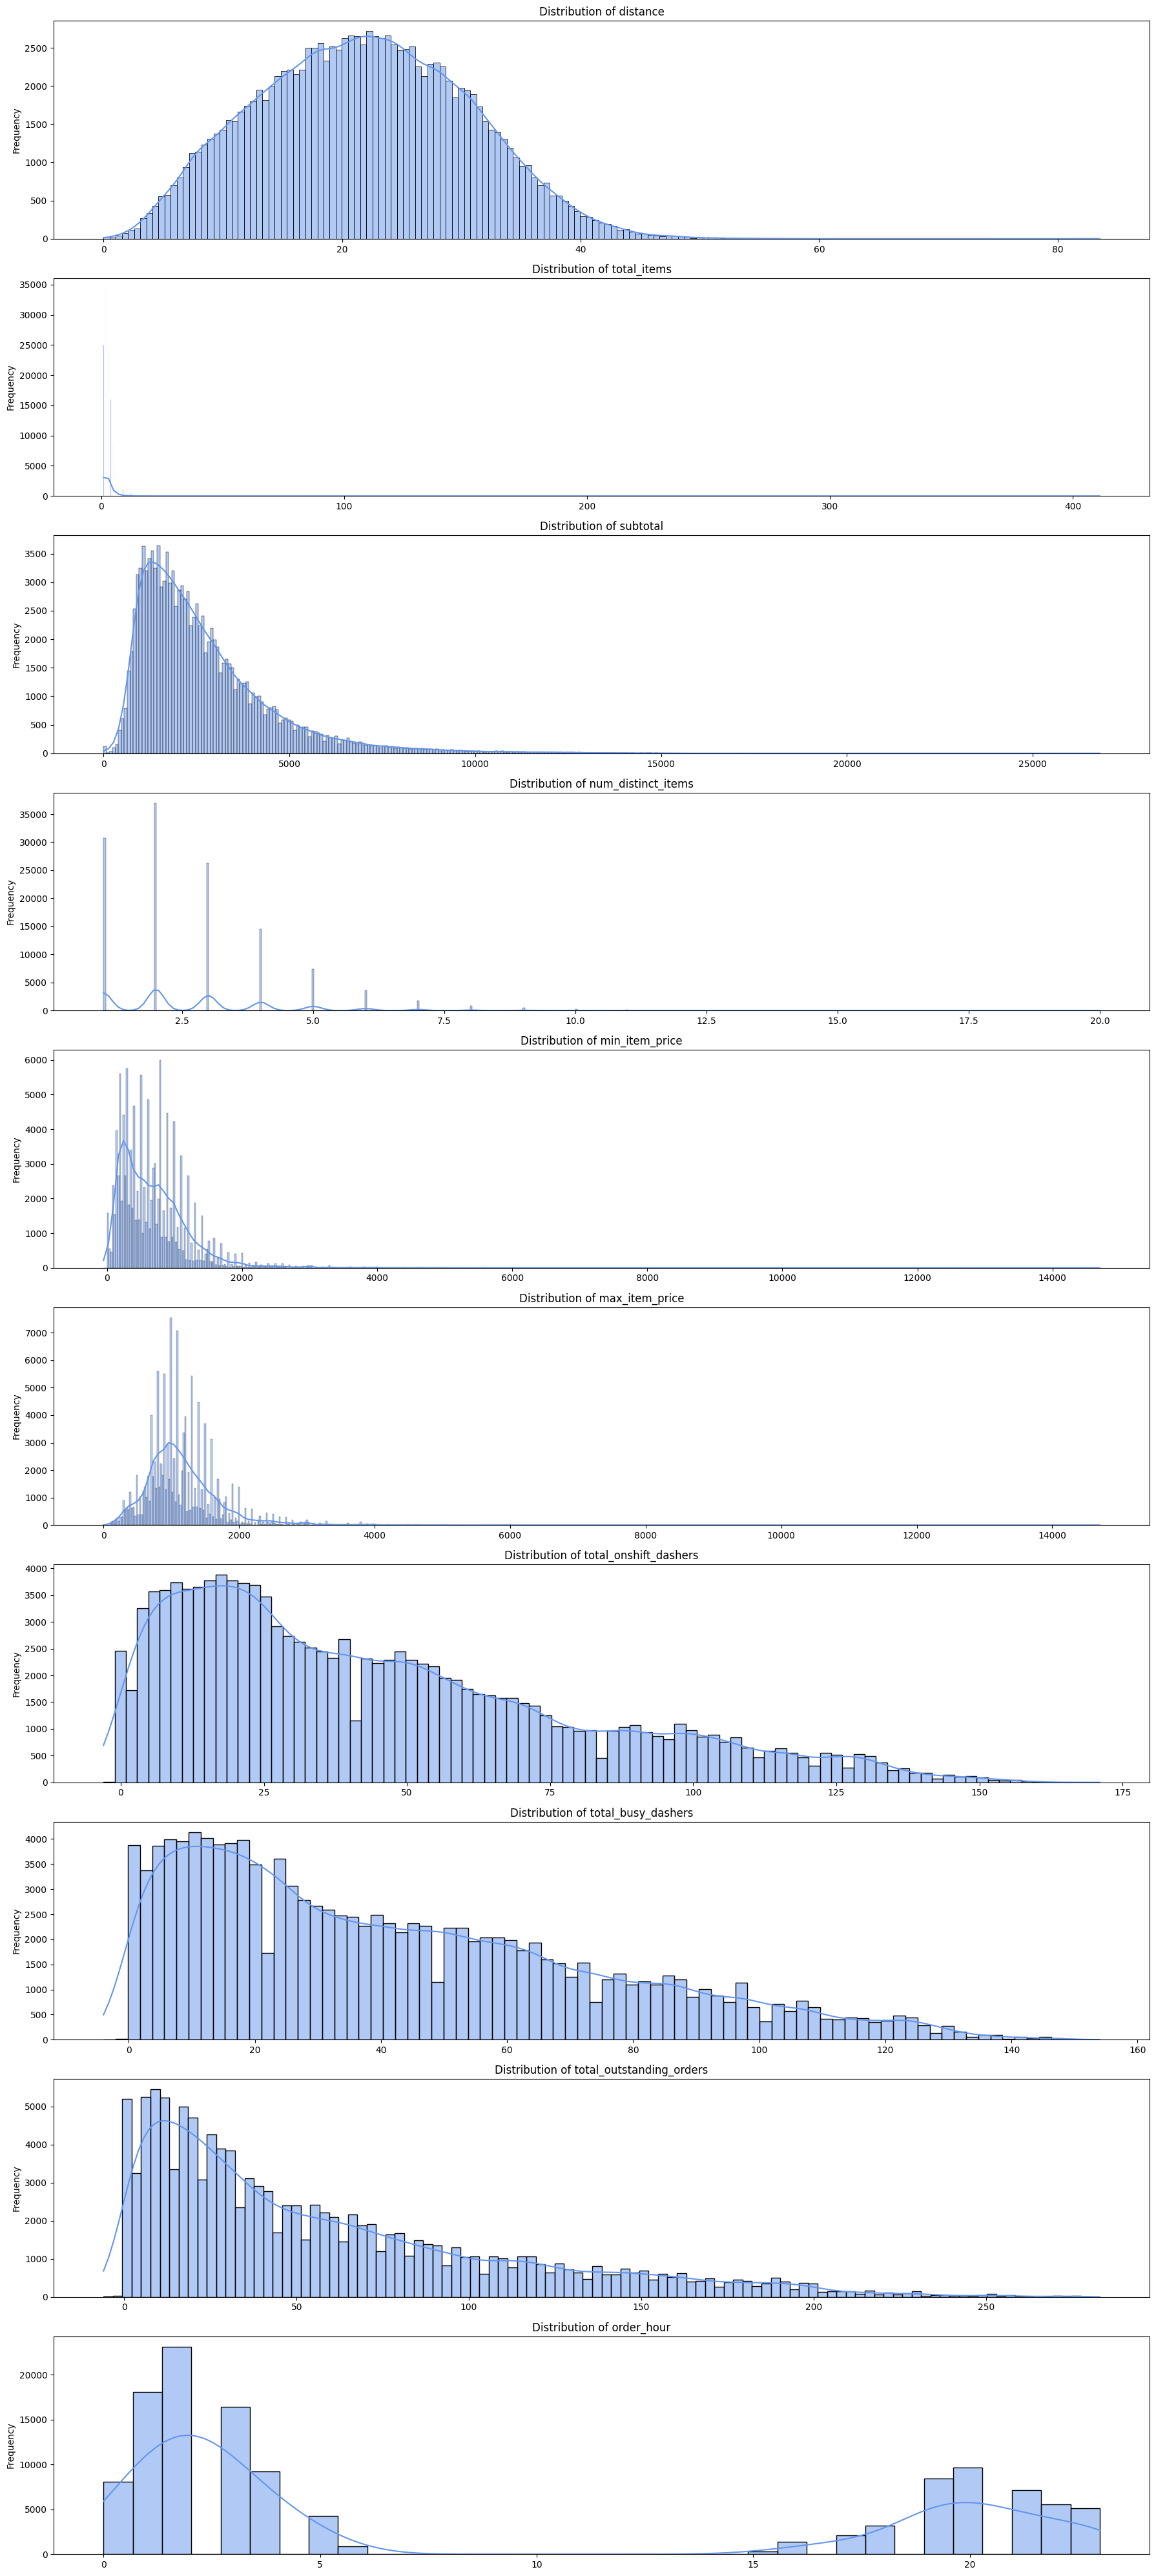

In [37]:
plt.figure(figsize=(18, len(num_columns) * 4))

# Loop through each numerical feature and plot its distribution
for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 1, i)
    sns.histplot(df_train[col], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [39]:
df_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6', 'store_primary_category_1',
       'store_primary_category_2', 'store_primary_category_3',
       'store_primary_category_4', 'store_primary_category_5',
       'store_primary_category_6', 'store_primary_category_7',
       'store_primary_category_8', 'store_primary_category_9',
       'store_primary_category_10', 'store_primary_category_11',
       'store_primary_category_12', 'store_primary_category_13',
       'store_primary_category_14', 'store_primary_category_15',
       'store_primary_category_16', 'store_primary_category_17',
       'store_primary_category_18', 'store_primary_category_19',
       'store_primary_category_20', 'store_primary_categ

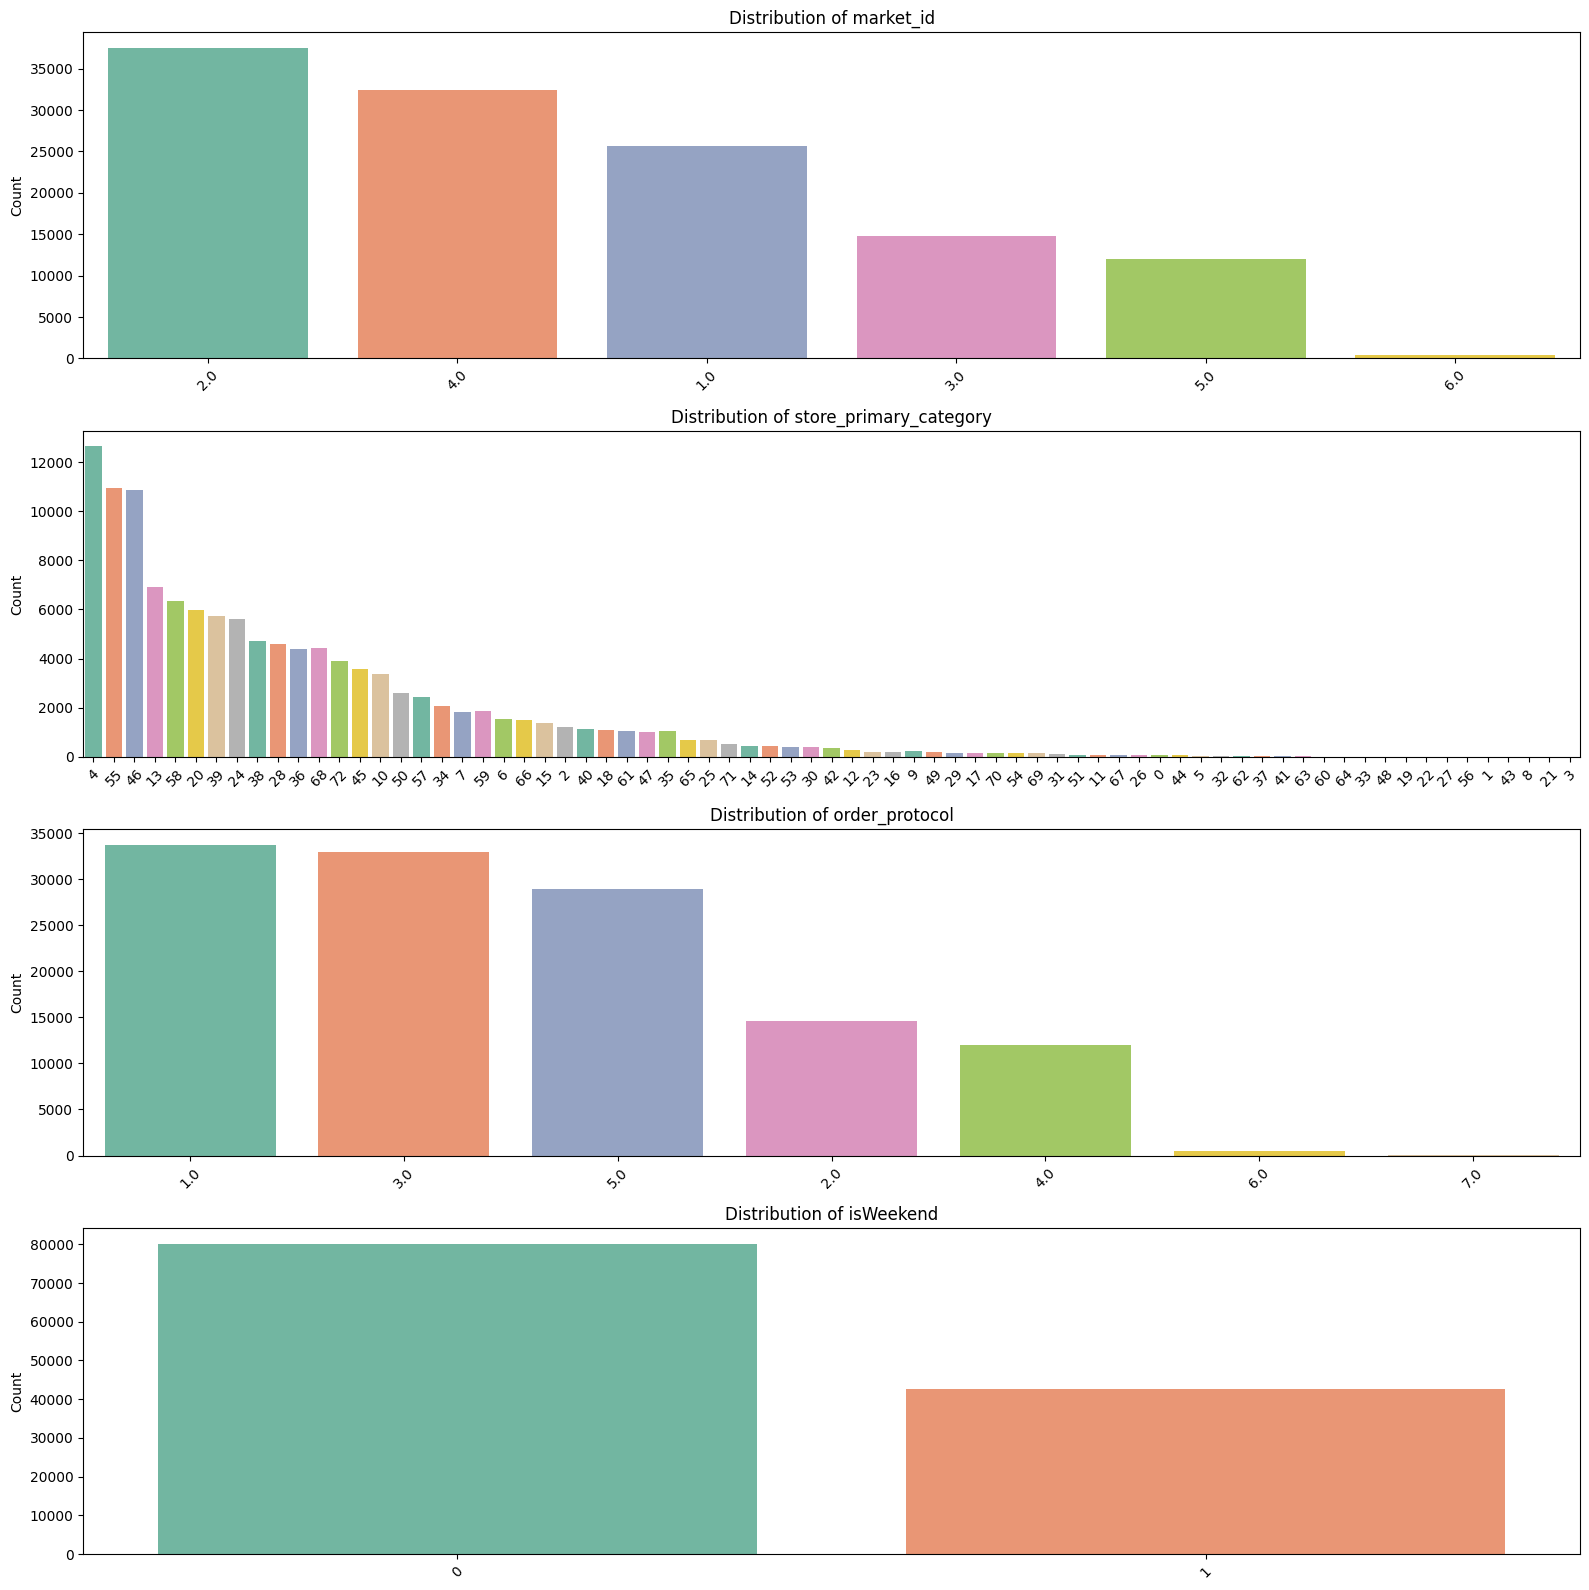

In [84]:
# Distribution of categorical columns
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

# Set up plot size dynamically
plt.figure(figsize=(16, len(cat_cols) * 4))

# Loop and plot each categorical feature
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(data=df_train, x=col, order=df_copy[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

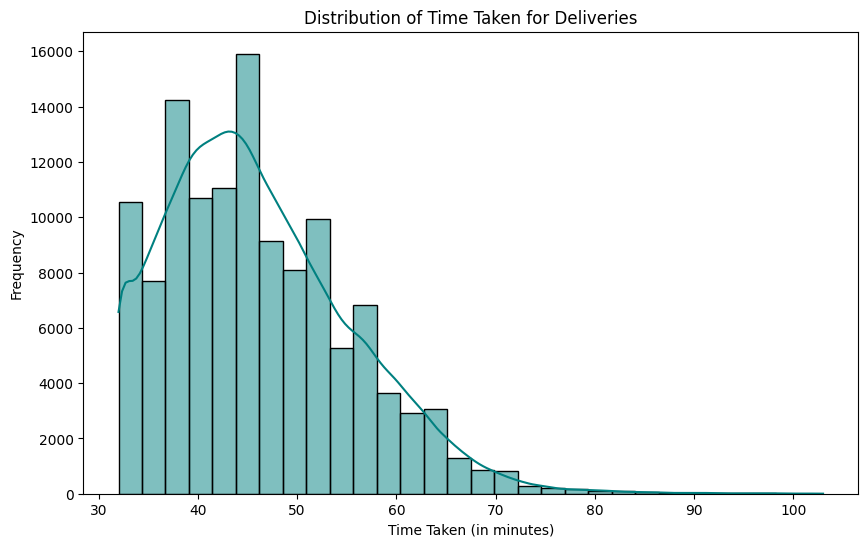

In [43]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(df_train['delivery_minutes'], kde=True, bins=30, color='teal')
plt.title('Distribution of Time Taken for Deliveries')
plt.xlabel('Time Taken (in minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

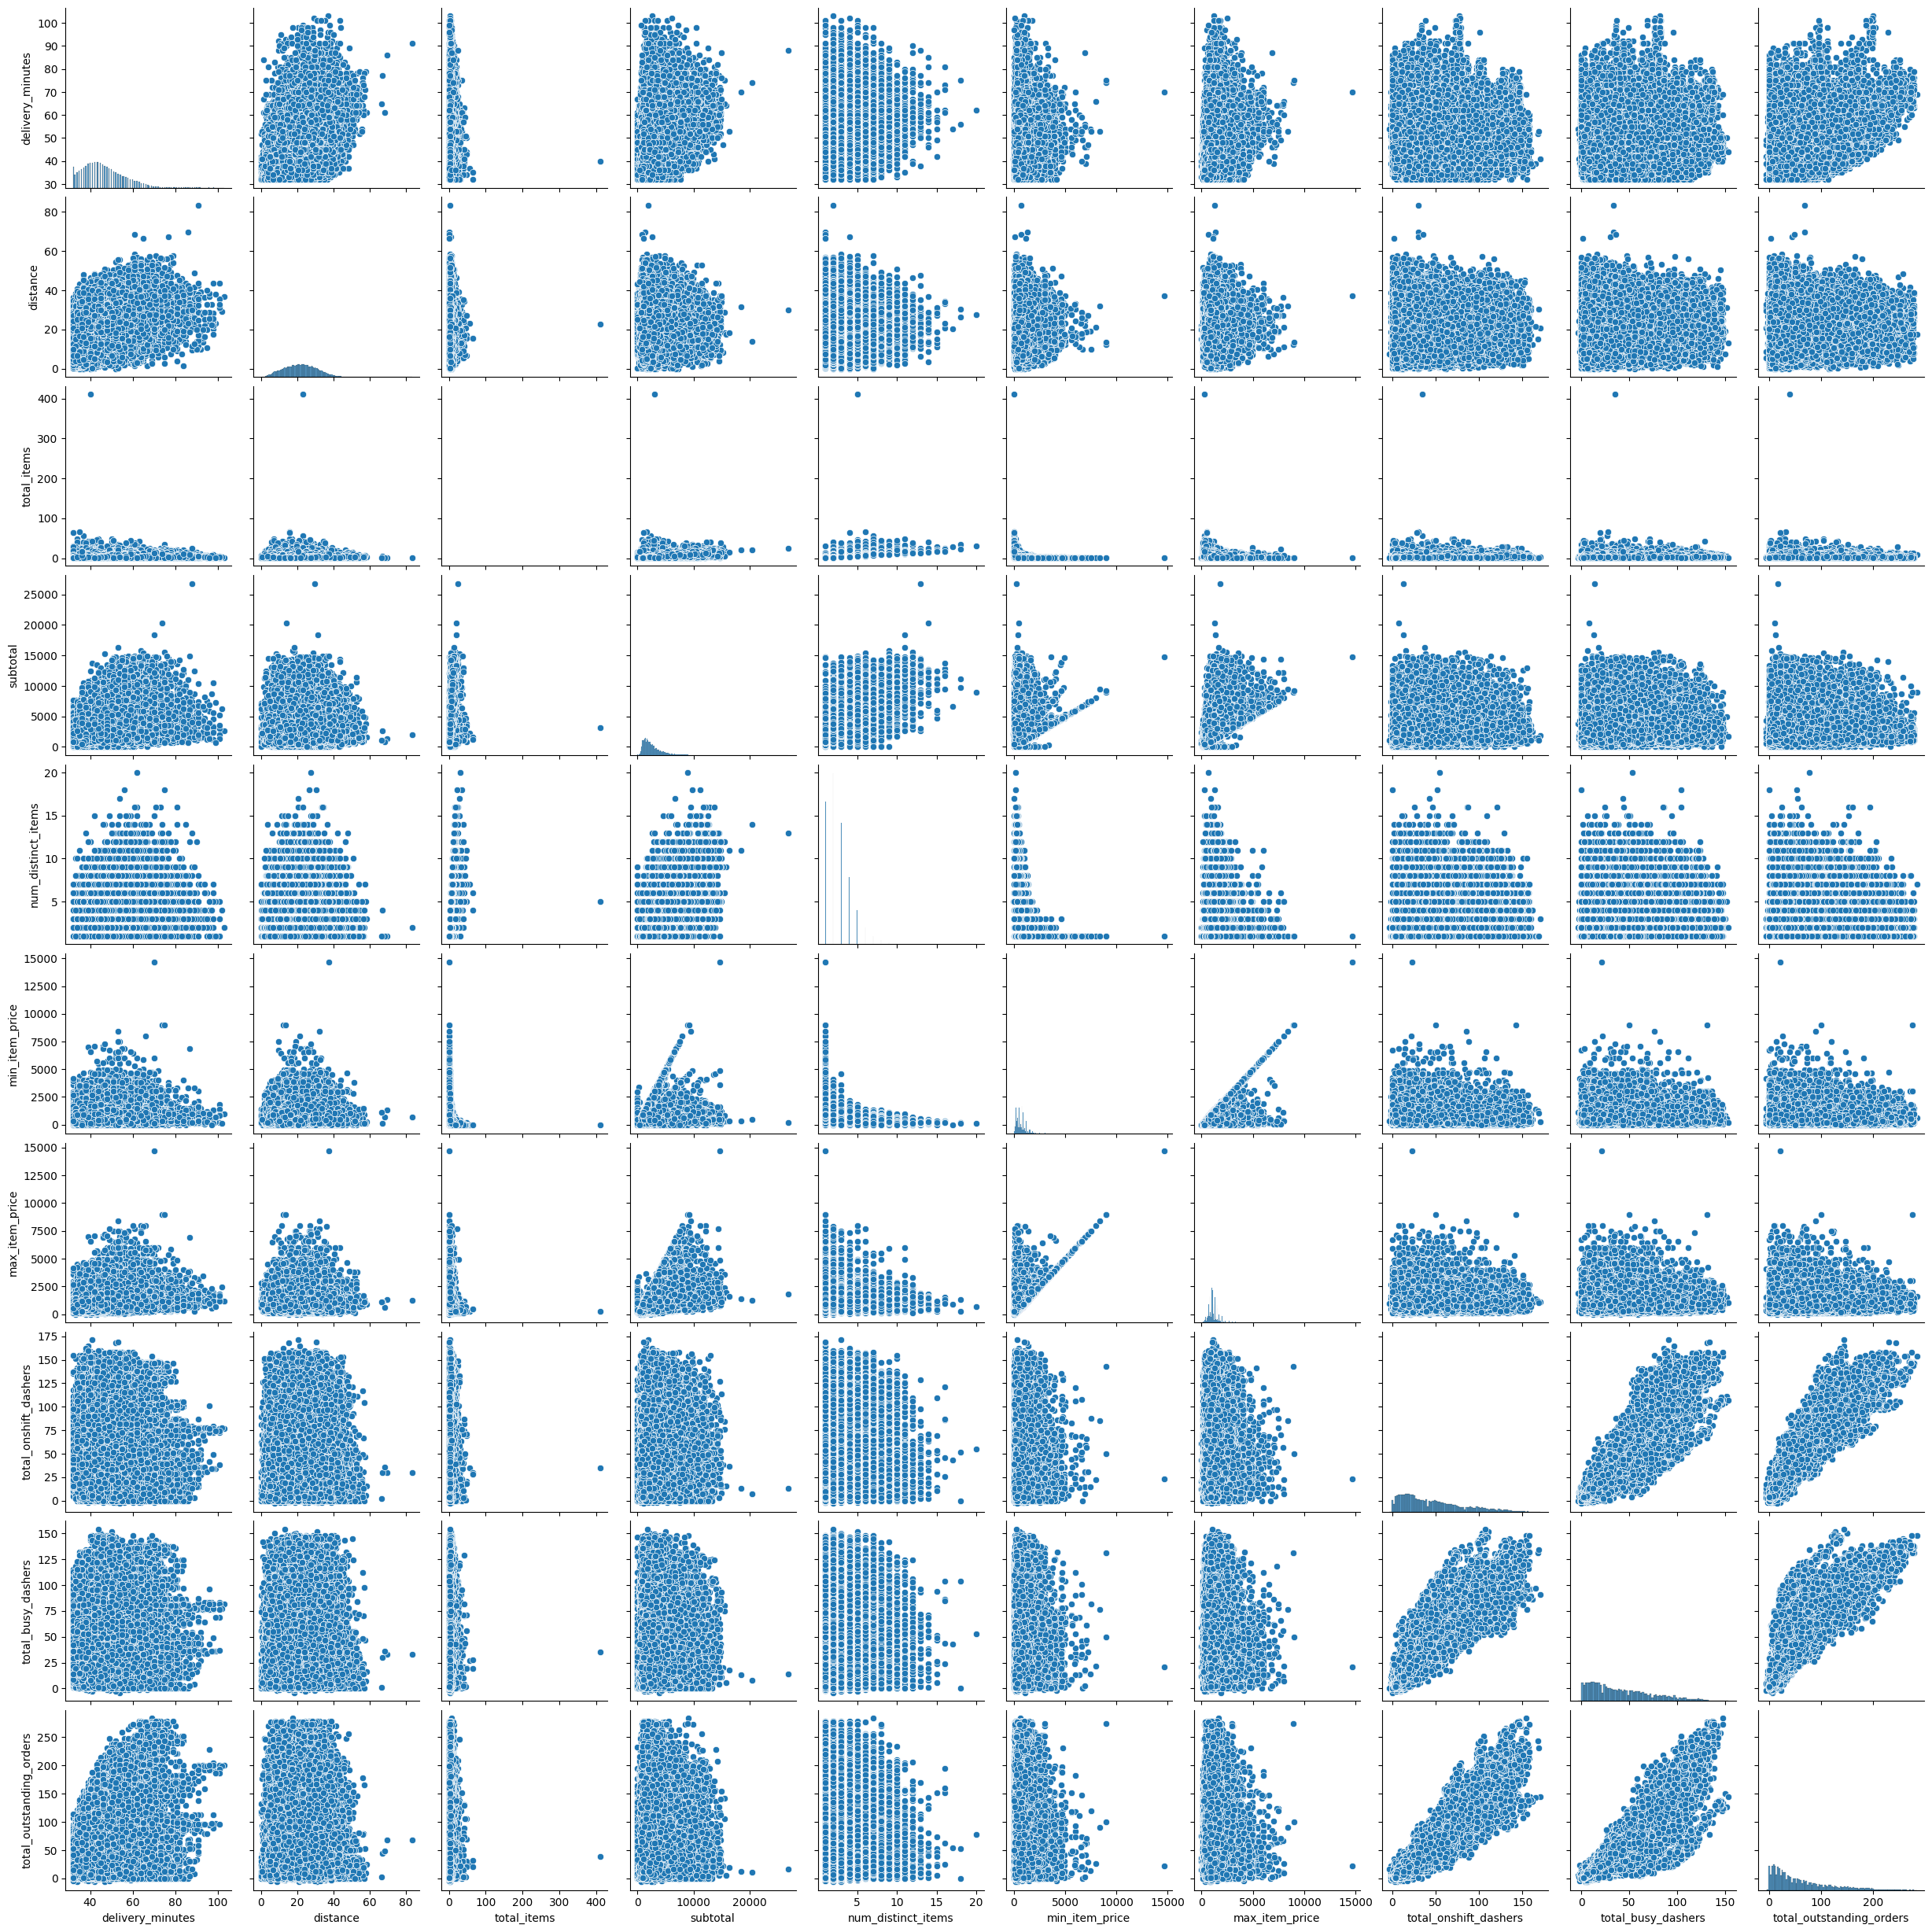

In [45]:
# Scatter plot to visualise the relationship between time_taken and other features
num_columns_dt = ['delivery_minutes','distance','total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders']

sns.pairplot(df_train[num_columns_dt])
plt.show()


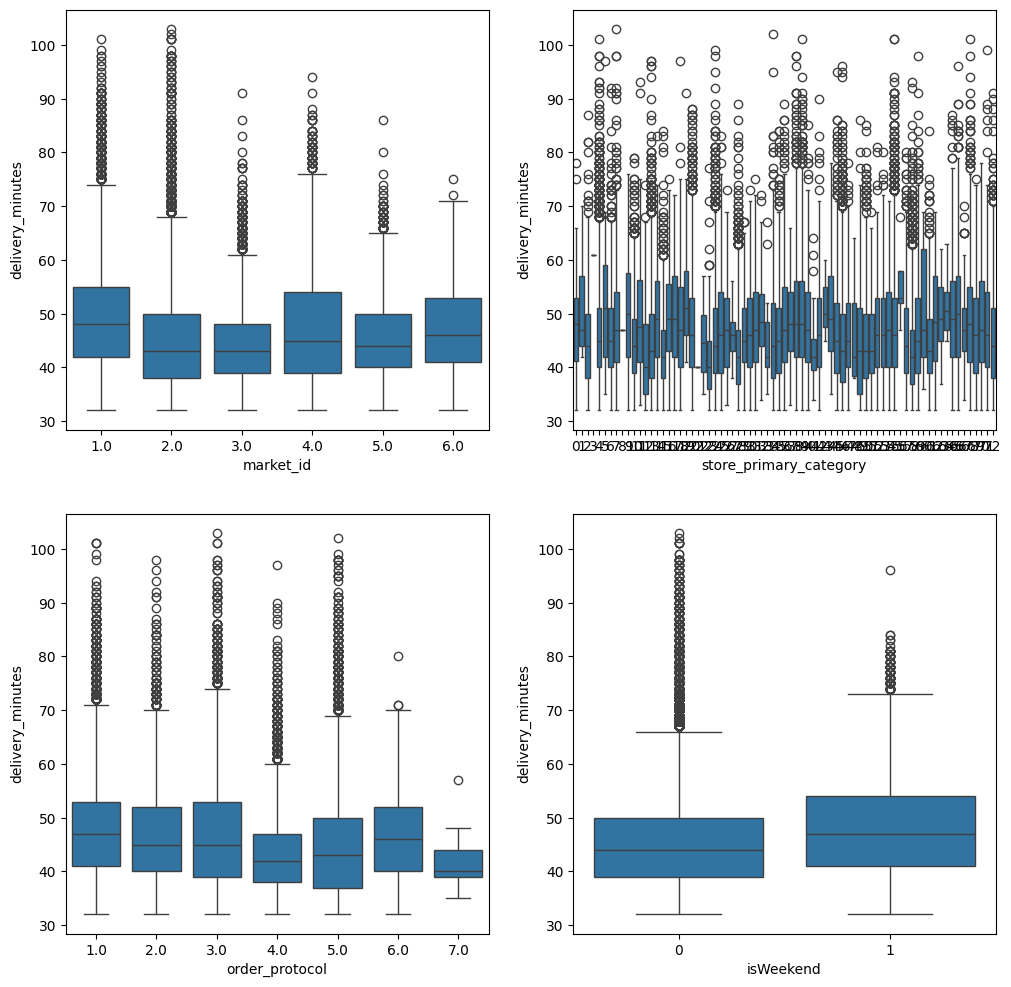

In [47]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(x='market_id',y='delivery_minutes', data=df_train)
plt.subplot(2,2,2)
sns.boxplot(x='store_primary_category',y='delivery_minutes', data=df_train)
plt.subplot(2,2,3)
sns.boxplot(x='order_protocol',y='delivery_minutes', data=df_train)
plt.subplot(2,2,4)
sns.boxplot(x='isWeekend',y='delivery_minutes', data=df_train)
plt.show()

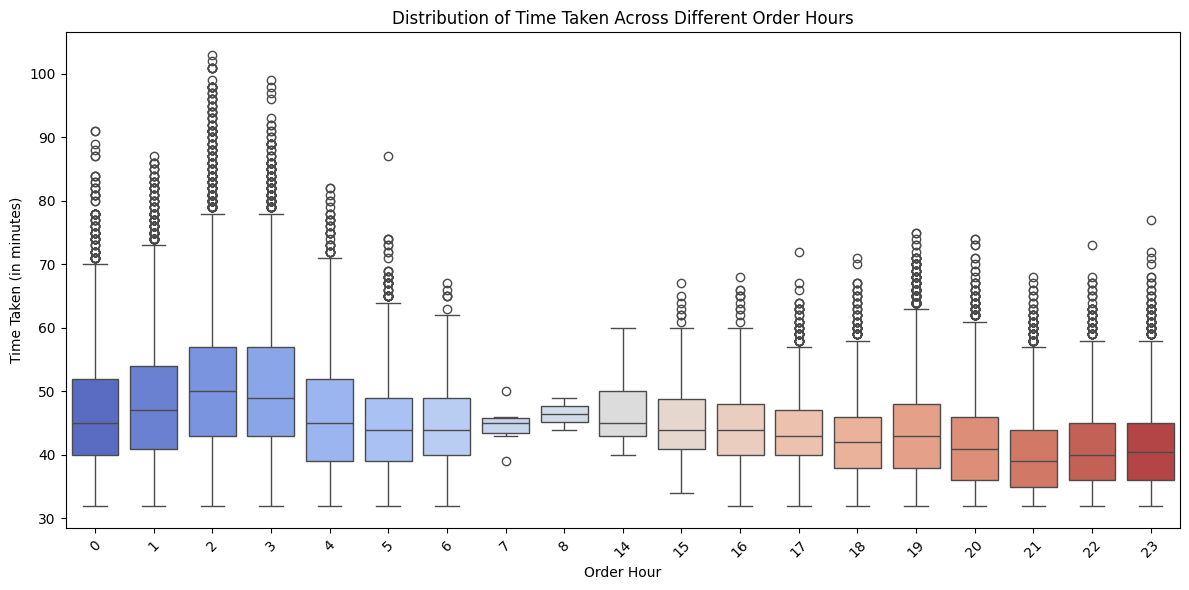

In [49]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='order_hour', y='delivery_minutes', palette='coolwarm')
plt.title('Distribution of Time Taken Across Different Order Hours')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken (in minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

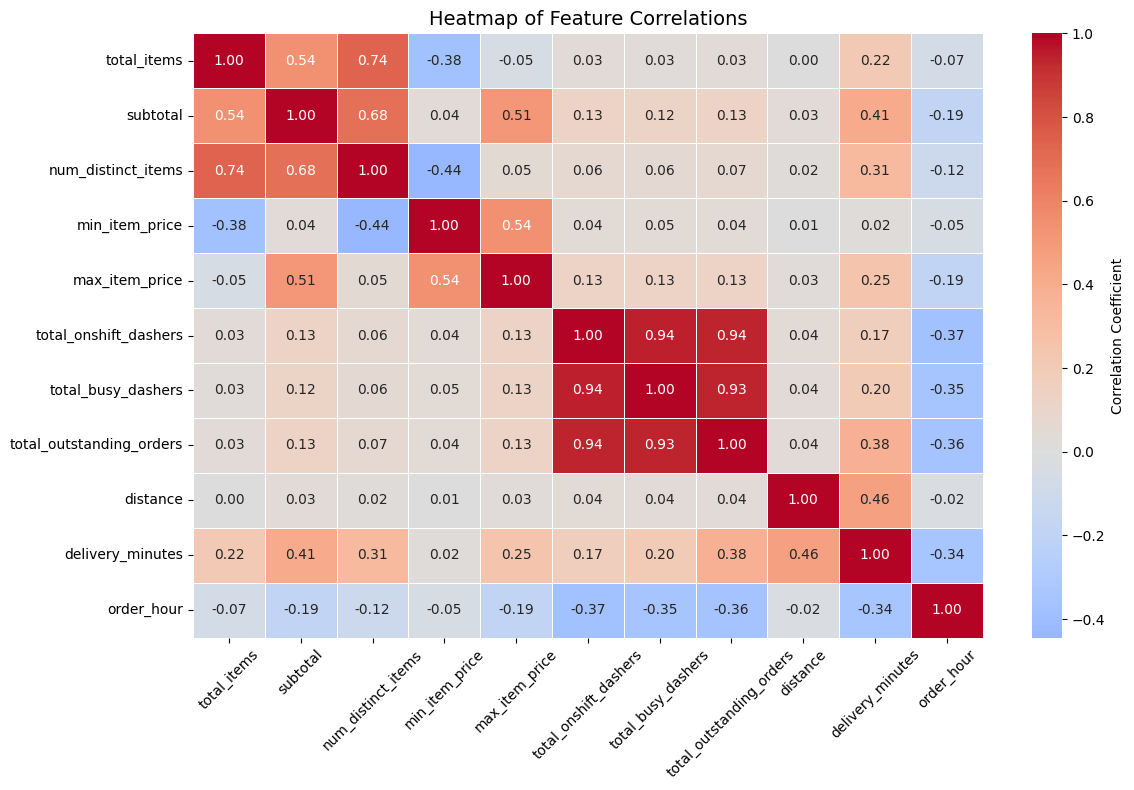

In [51]:
# Plot the heatmap of the correlation matrix

prefixes_to_exclude = ['market_id', 'store_primary_category', 'order_protocol','isWeekend']

filtered_df = df_train.loc[:, ~df_train.columns.str.startswith(tuple(prefixes_to_exclude))]
corr_matrix = filtered_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heatmap of Feature Correlations', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [159]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2', 'market_id_3',
       'market_id_4', 'market_id_5', 'market_id_6', 'store_primary_category_1',
       'store_primary_category_2', 'store_primary_category_3',
       'store_primary_category_4', 'store_primary_category_5',
       'store_primary_category_6', 'store_primary_category_7',
       'store_primary_category_8', 'store_primary_category_9',
       'store_primary_category_10', 'store_primary_category_11',
       'store_primary_category_12', 'store_primary_category_13',
       'store_primary_category_14', 'store_primary_category_15',
       'store_primary_category_16', 'store_primary_category_17',
       'store_primary_category_18', 'store_primary_category_19',
       'store_primary_category_20', 'store_primary_category_21',
       'store_primary_category_22', 'store_primary_cate

In [59]:
# Drop 3-5 weakly correlated columns from training dataset
# Reason for 'min_item_price', 'total_onshift_dashers' is that coefficient seems very less. total items was deleted as usnique number of items shows same information

df_train.drop(['min_item_price', 'total_onshift_dashers', 'total_items'], axis=1, inplace=True)



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

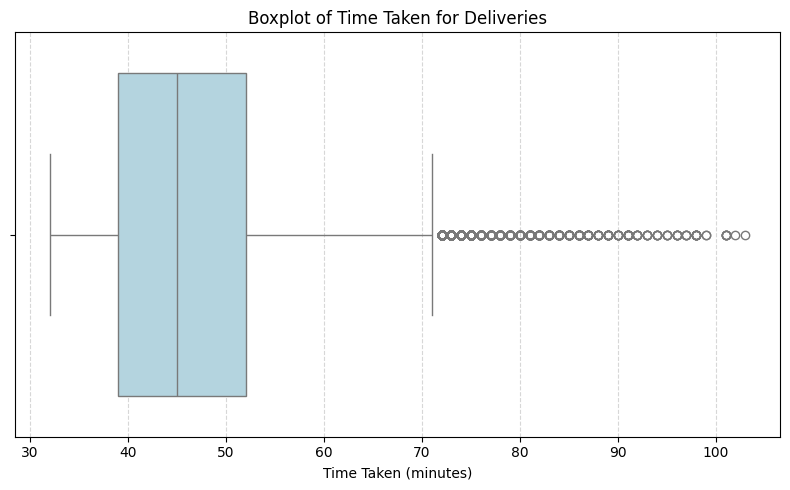

In [55]:
# Boxplot for time_taken


plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['delivery_minutes'], color='lightblue')
plt.title('Boxplot of Time Taken for Deliveries')
plt.xlabel('Time Taken (minutes)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


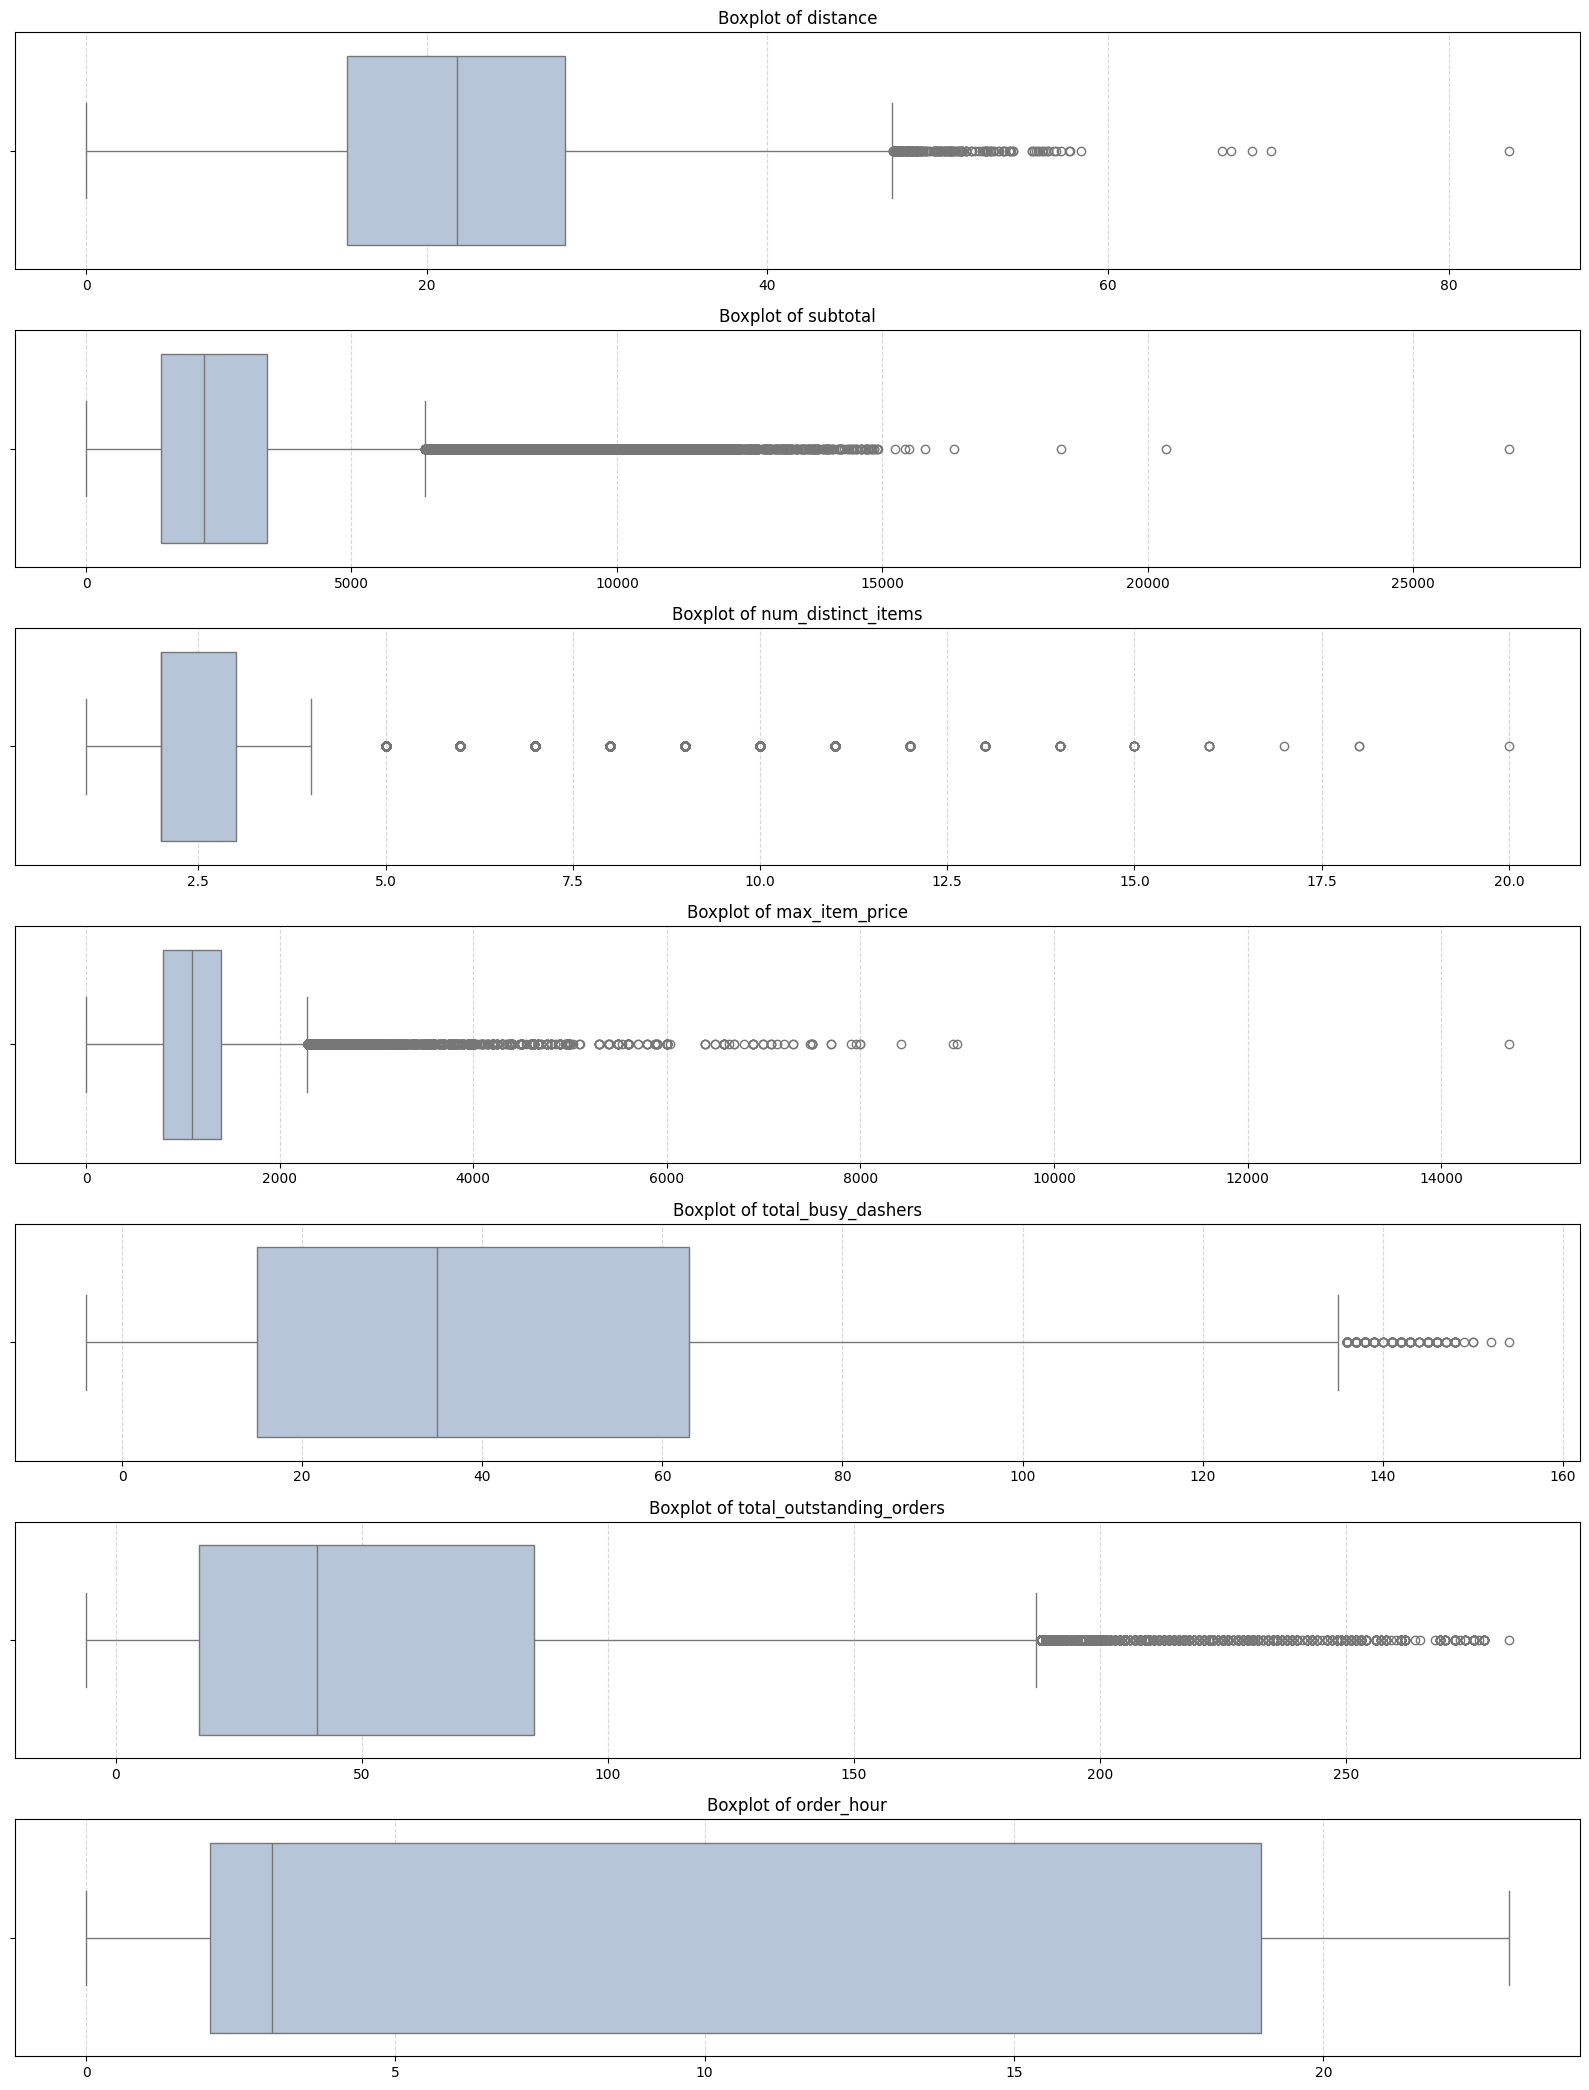

In [61]:
# Box plot for other numerical variables

num_columns = ['distance', 'subtotal', 'num_distinct_items', 
       'max_item_price', 'total_busy_dashers',
       'total_outstanding_orders', 'order_hour']
plt.figure(figsize=(16, len(num_columns) * 3))

for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 1, i)
    sns.boxplot(x=df_train[col], color='lightsteelblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()

plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [69]:
total_records = len (df_train['delivery_minutes'])
num_records = (df_train['delivery_minutes'] > 80).sum()
print(f"Total Number of deliveries - {total_records} and deliveries taking more than 80 minutes: {num_records}")


Total Number of deliveries - 123043 and deliveries taking more than 80 minutes: 301


In [71]:
# Handle outliers
df_train = df_train[df_train['delivery_minutes'] <= 80]



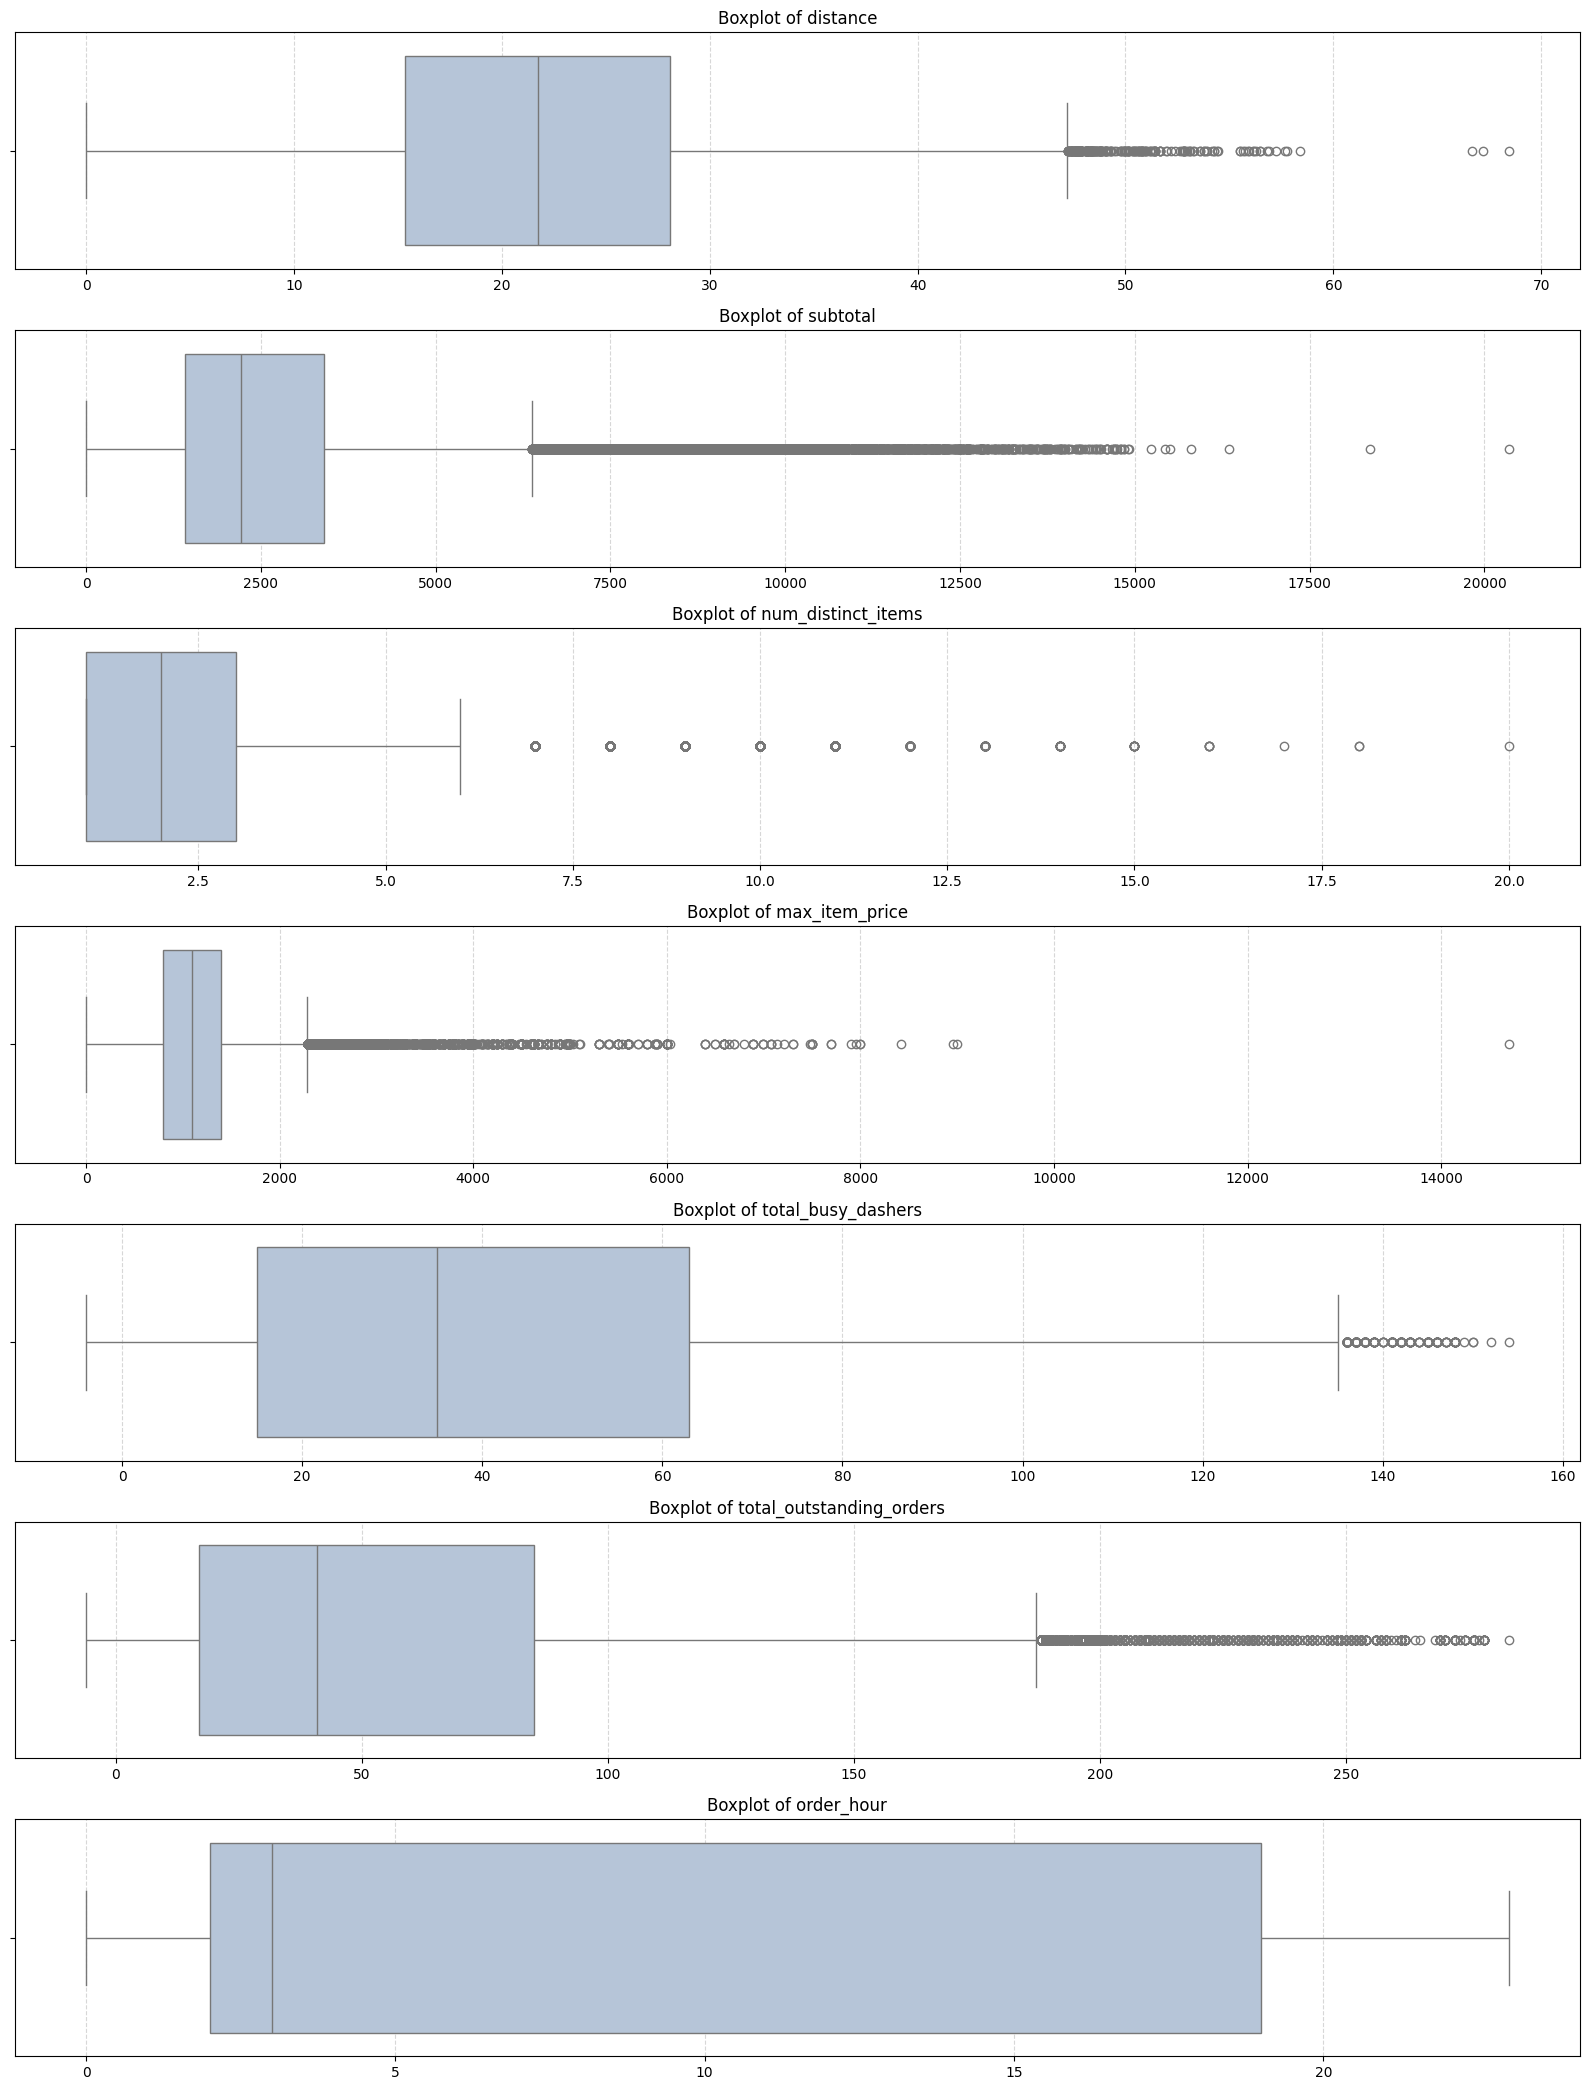

In [73]:
# re checking Box plot for other numerical variables

num_columns = ['distance', 'subtotal', 'num_distinct_items', 
       'max_item_price', 'total_busy_dashers',
       'total_outstanding_orders', 'order_hour']
plt.figure(figsize=(16, len(num_columns) * 3))

for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 1, i)
    sns.boxplot(x=df_train[col], color='lightsteelblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()

plt.show()

In [ ]:
# Delete records with distance more then 60. As those are few outliers and we can delete those data points.

In [75]:
num_far_deliveries = (df_copy['distance'] > 60).sum()
print(f"Number of records with distance > 60 km: {num_far_deliveries}")


Number of records with distance > 60 km: 7


In [77]:
df_train = df_train[df_train['distance'] <= 60]


In [79]:
df.shape

(175777, 98)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

# Define numerical and categorical columns for easy EDA and data manipulation
- Numerical columns are - 'delivery_minutes','distance','total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'
- Categorical columns are - 'market_id', 'store_primary_category', 'order_protocol','isWeekend'


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

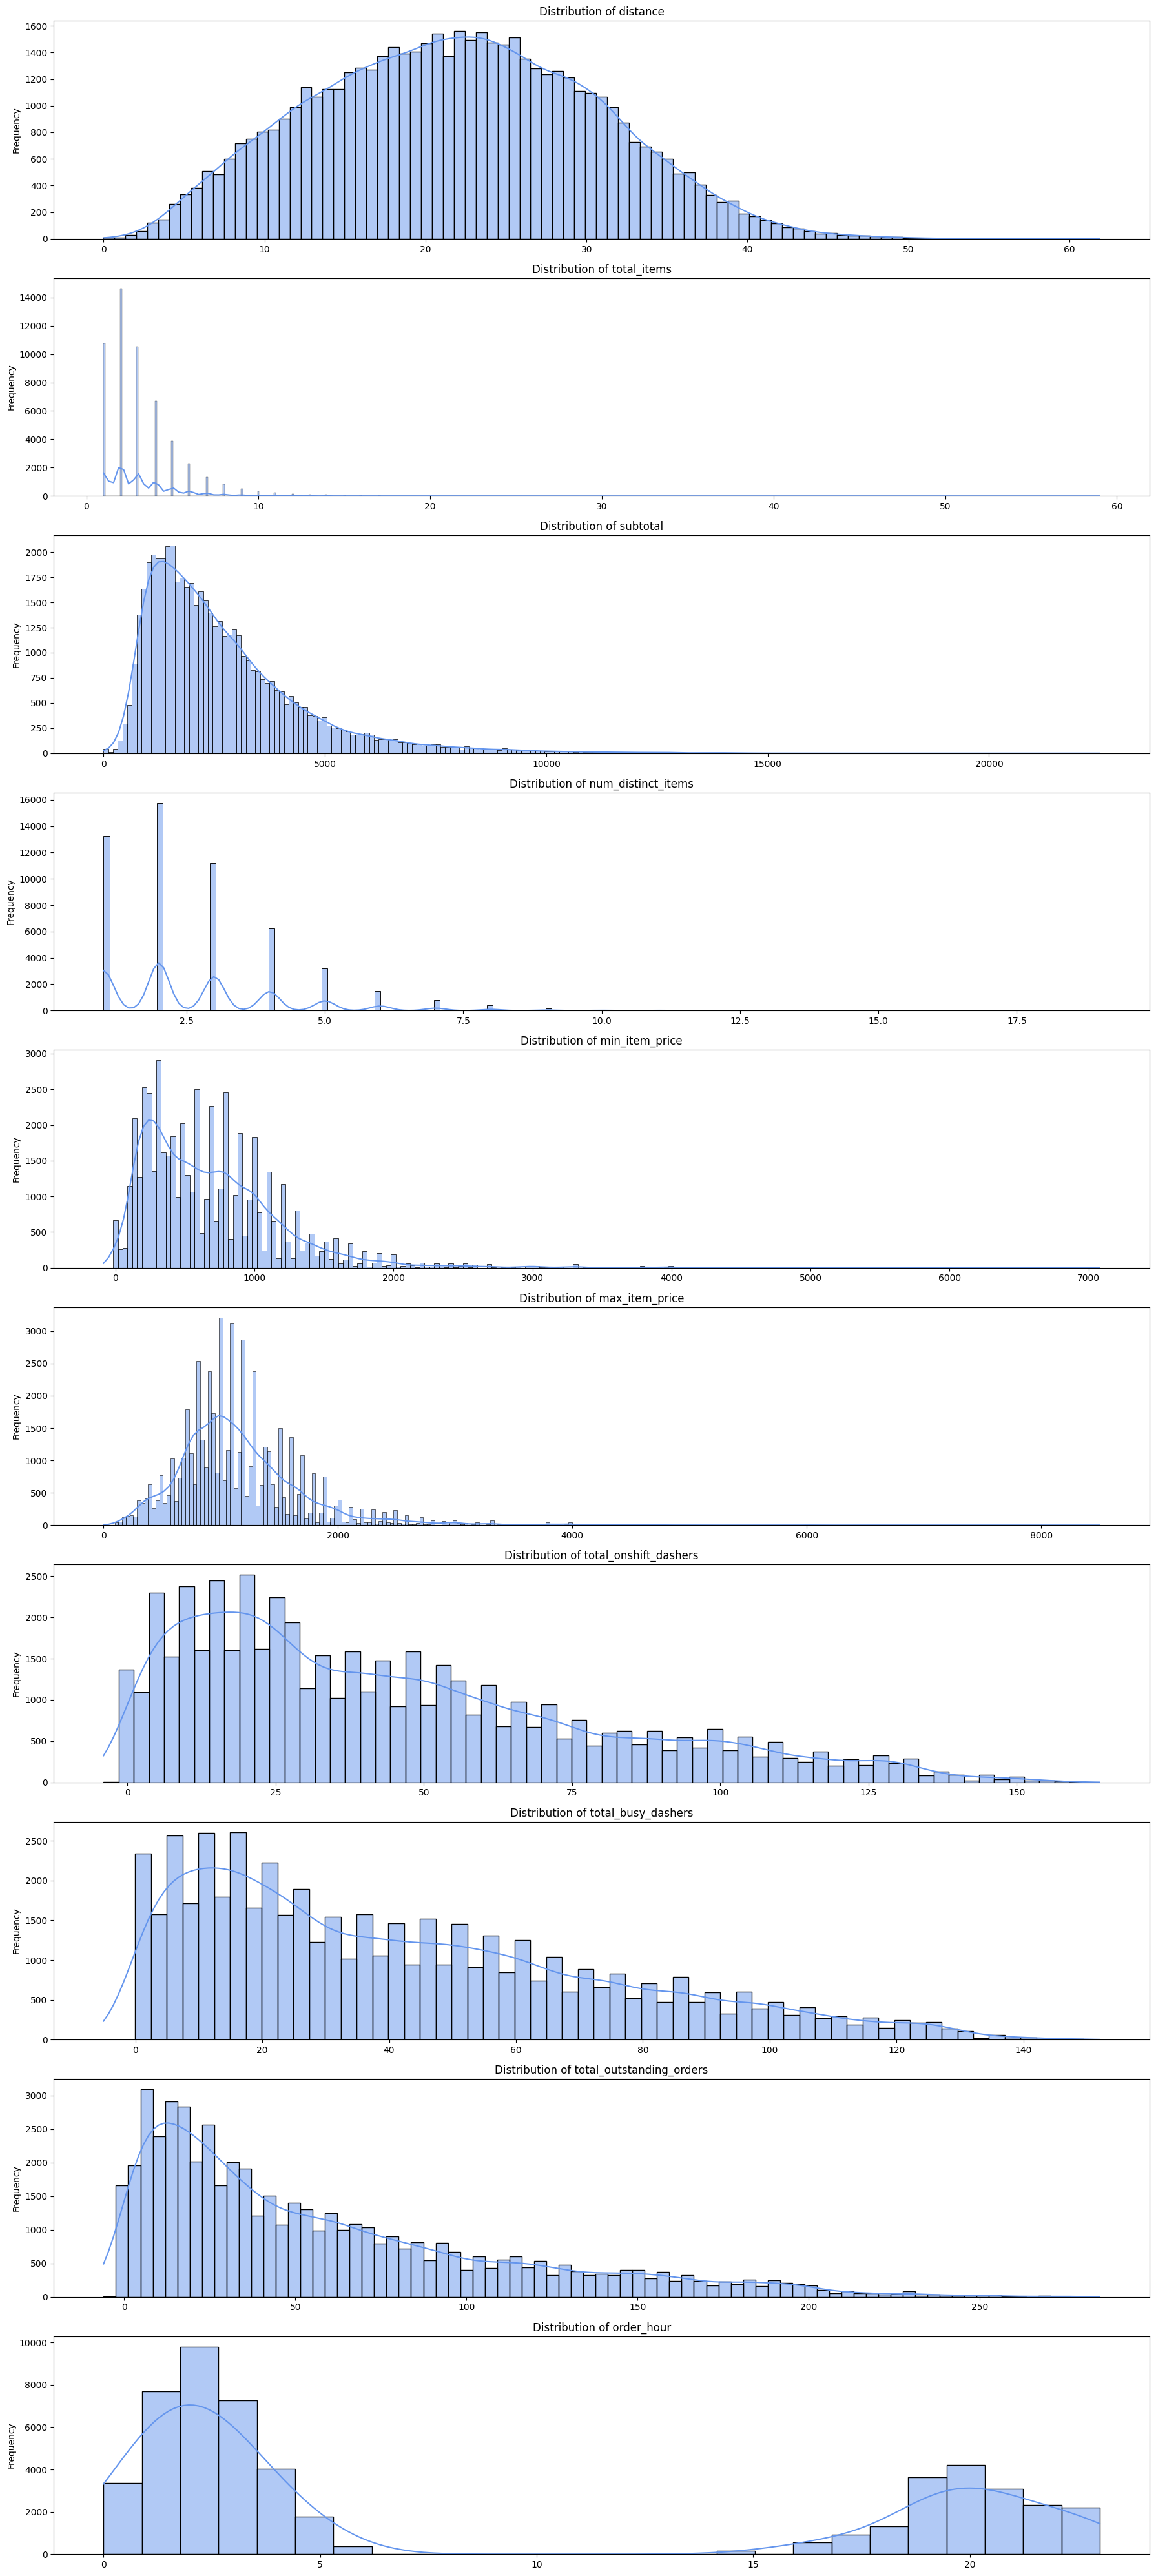

In [86]:
# Plot distributions for all numerical columns
num_columns = ['distance','total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'order_hour']

plt.figure(figsize=(18, len(num_columns) * 4))

# Loop through each numerical feature and plot its distribution
for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 1, i)
    sns.histplot(df_test[col], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


##### **4.1.2**
Check the distribution of categorical features

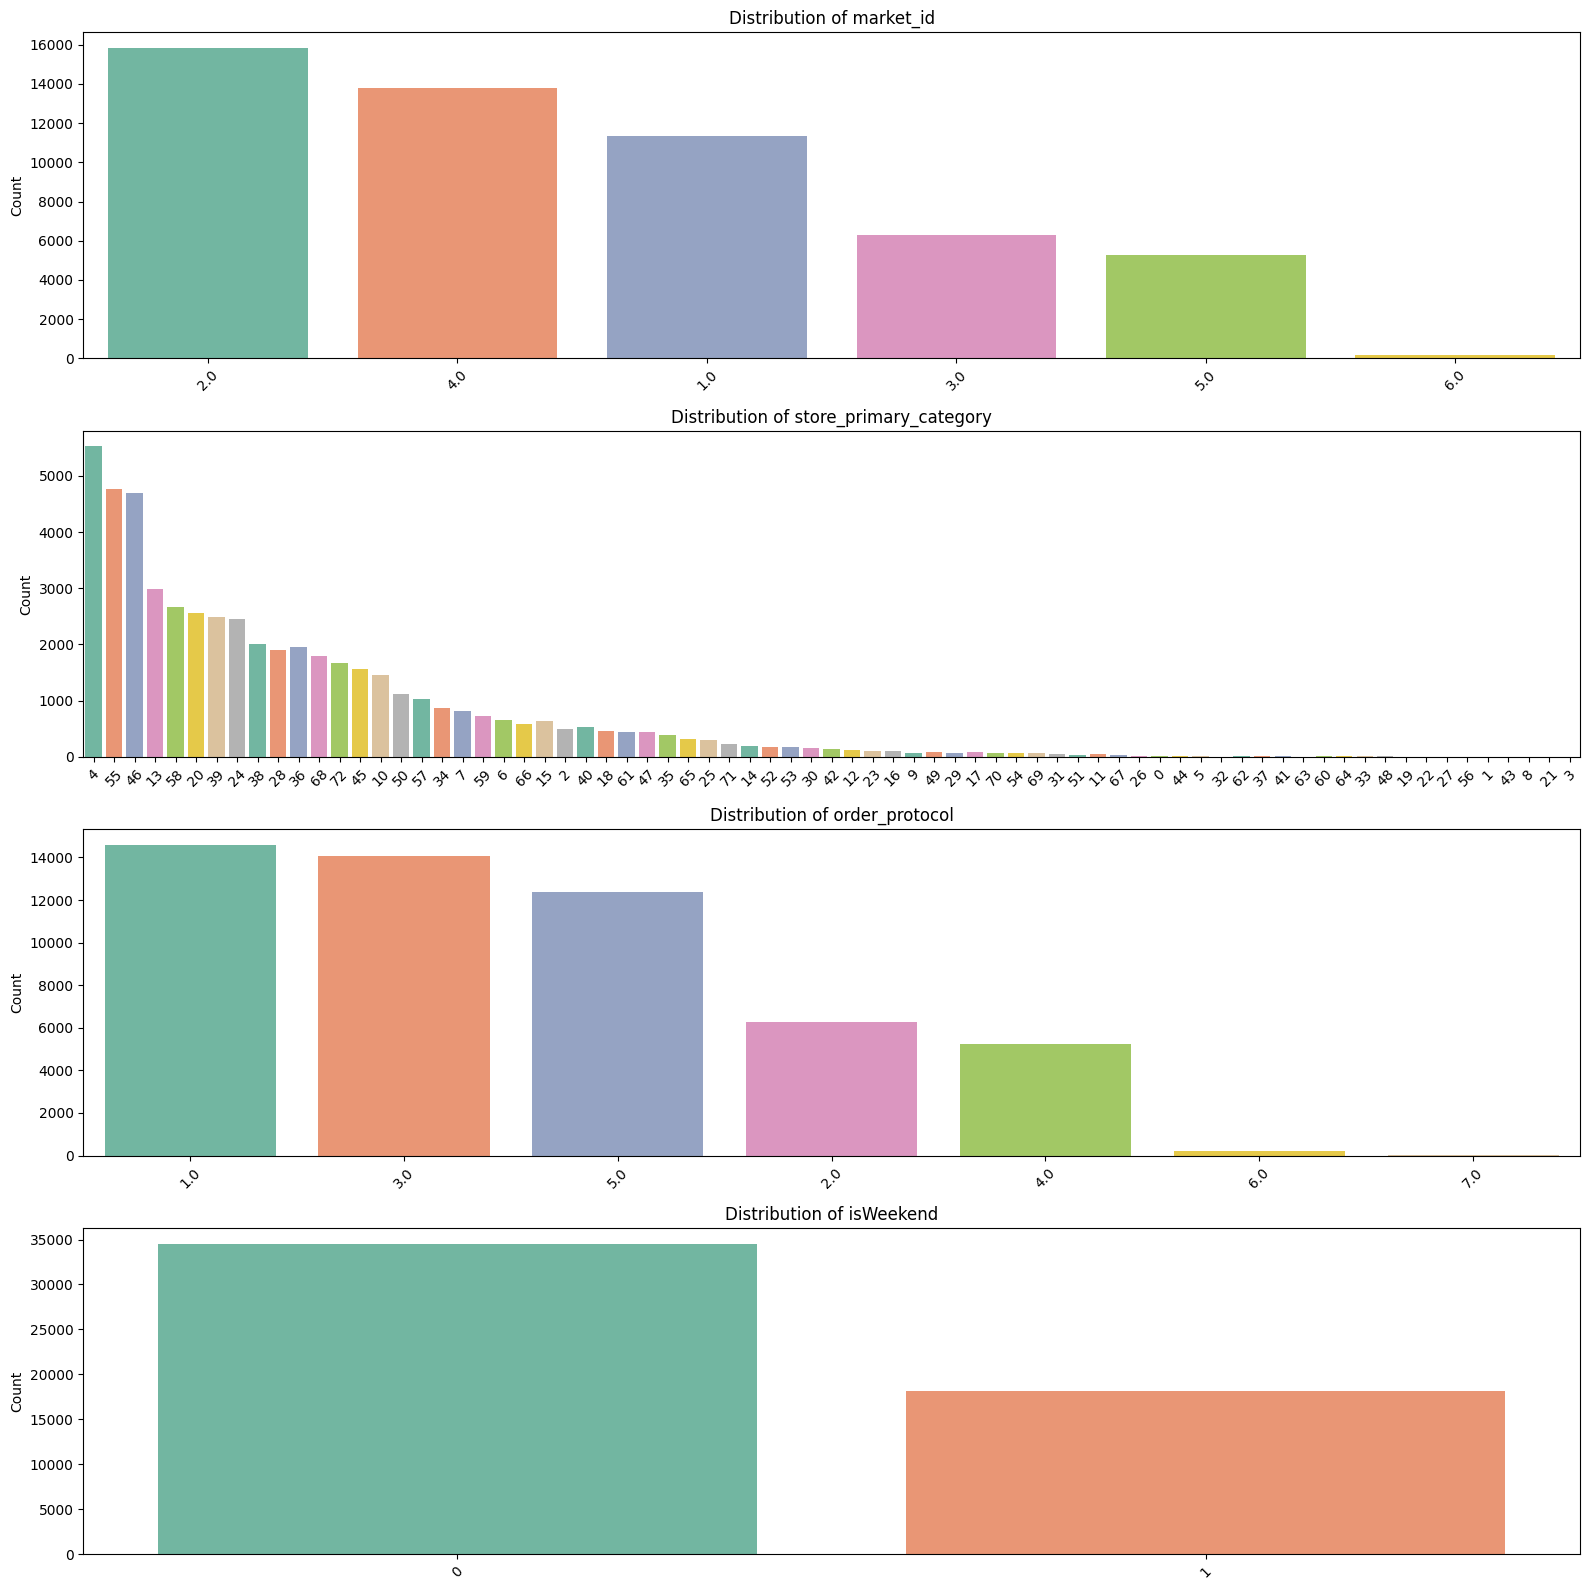

In [88]:
# Distribution of categorical columns

cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

# Set up plot size dynamically
plt.figure(figsize=(16, len(cat_cols) * 4))

# Loop and plot each categorical feature
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(data=df_test, x=col, order=df_copy[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

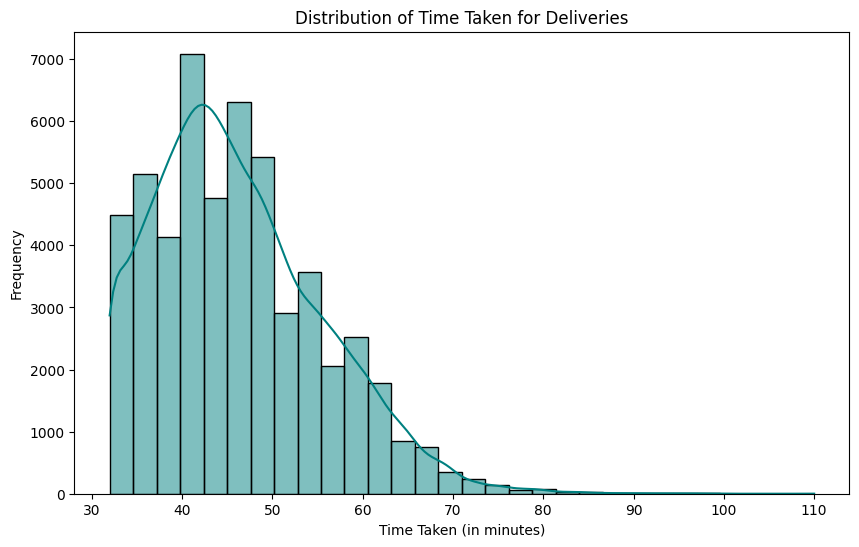

In [90]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(df_test['delivery_minutes'], kde=True, bins=30, color='teal')
plt.title('Distribution of Time Taken for Deliveries')
plt.xlabel('Time Taken (in minutes)')
plt.ylabel('Frequency')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

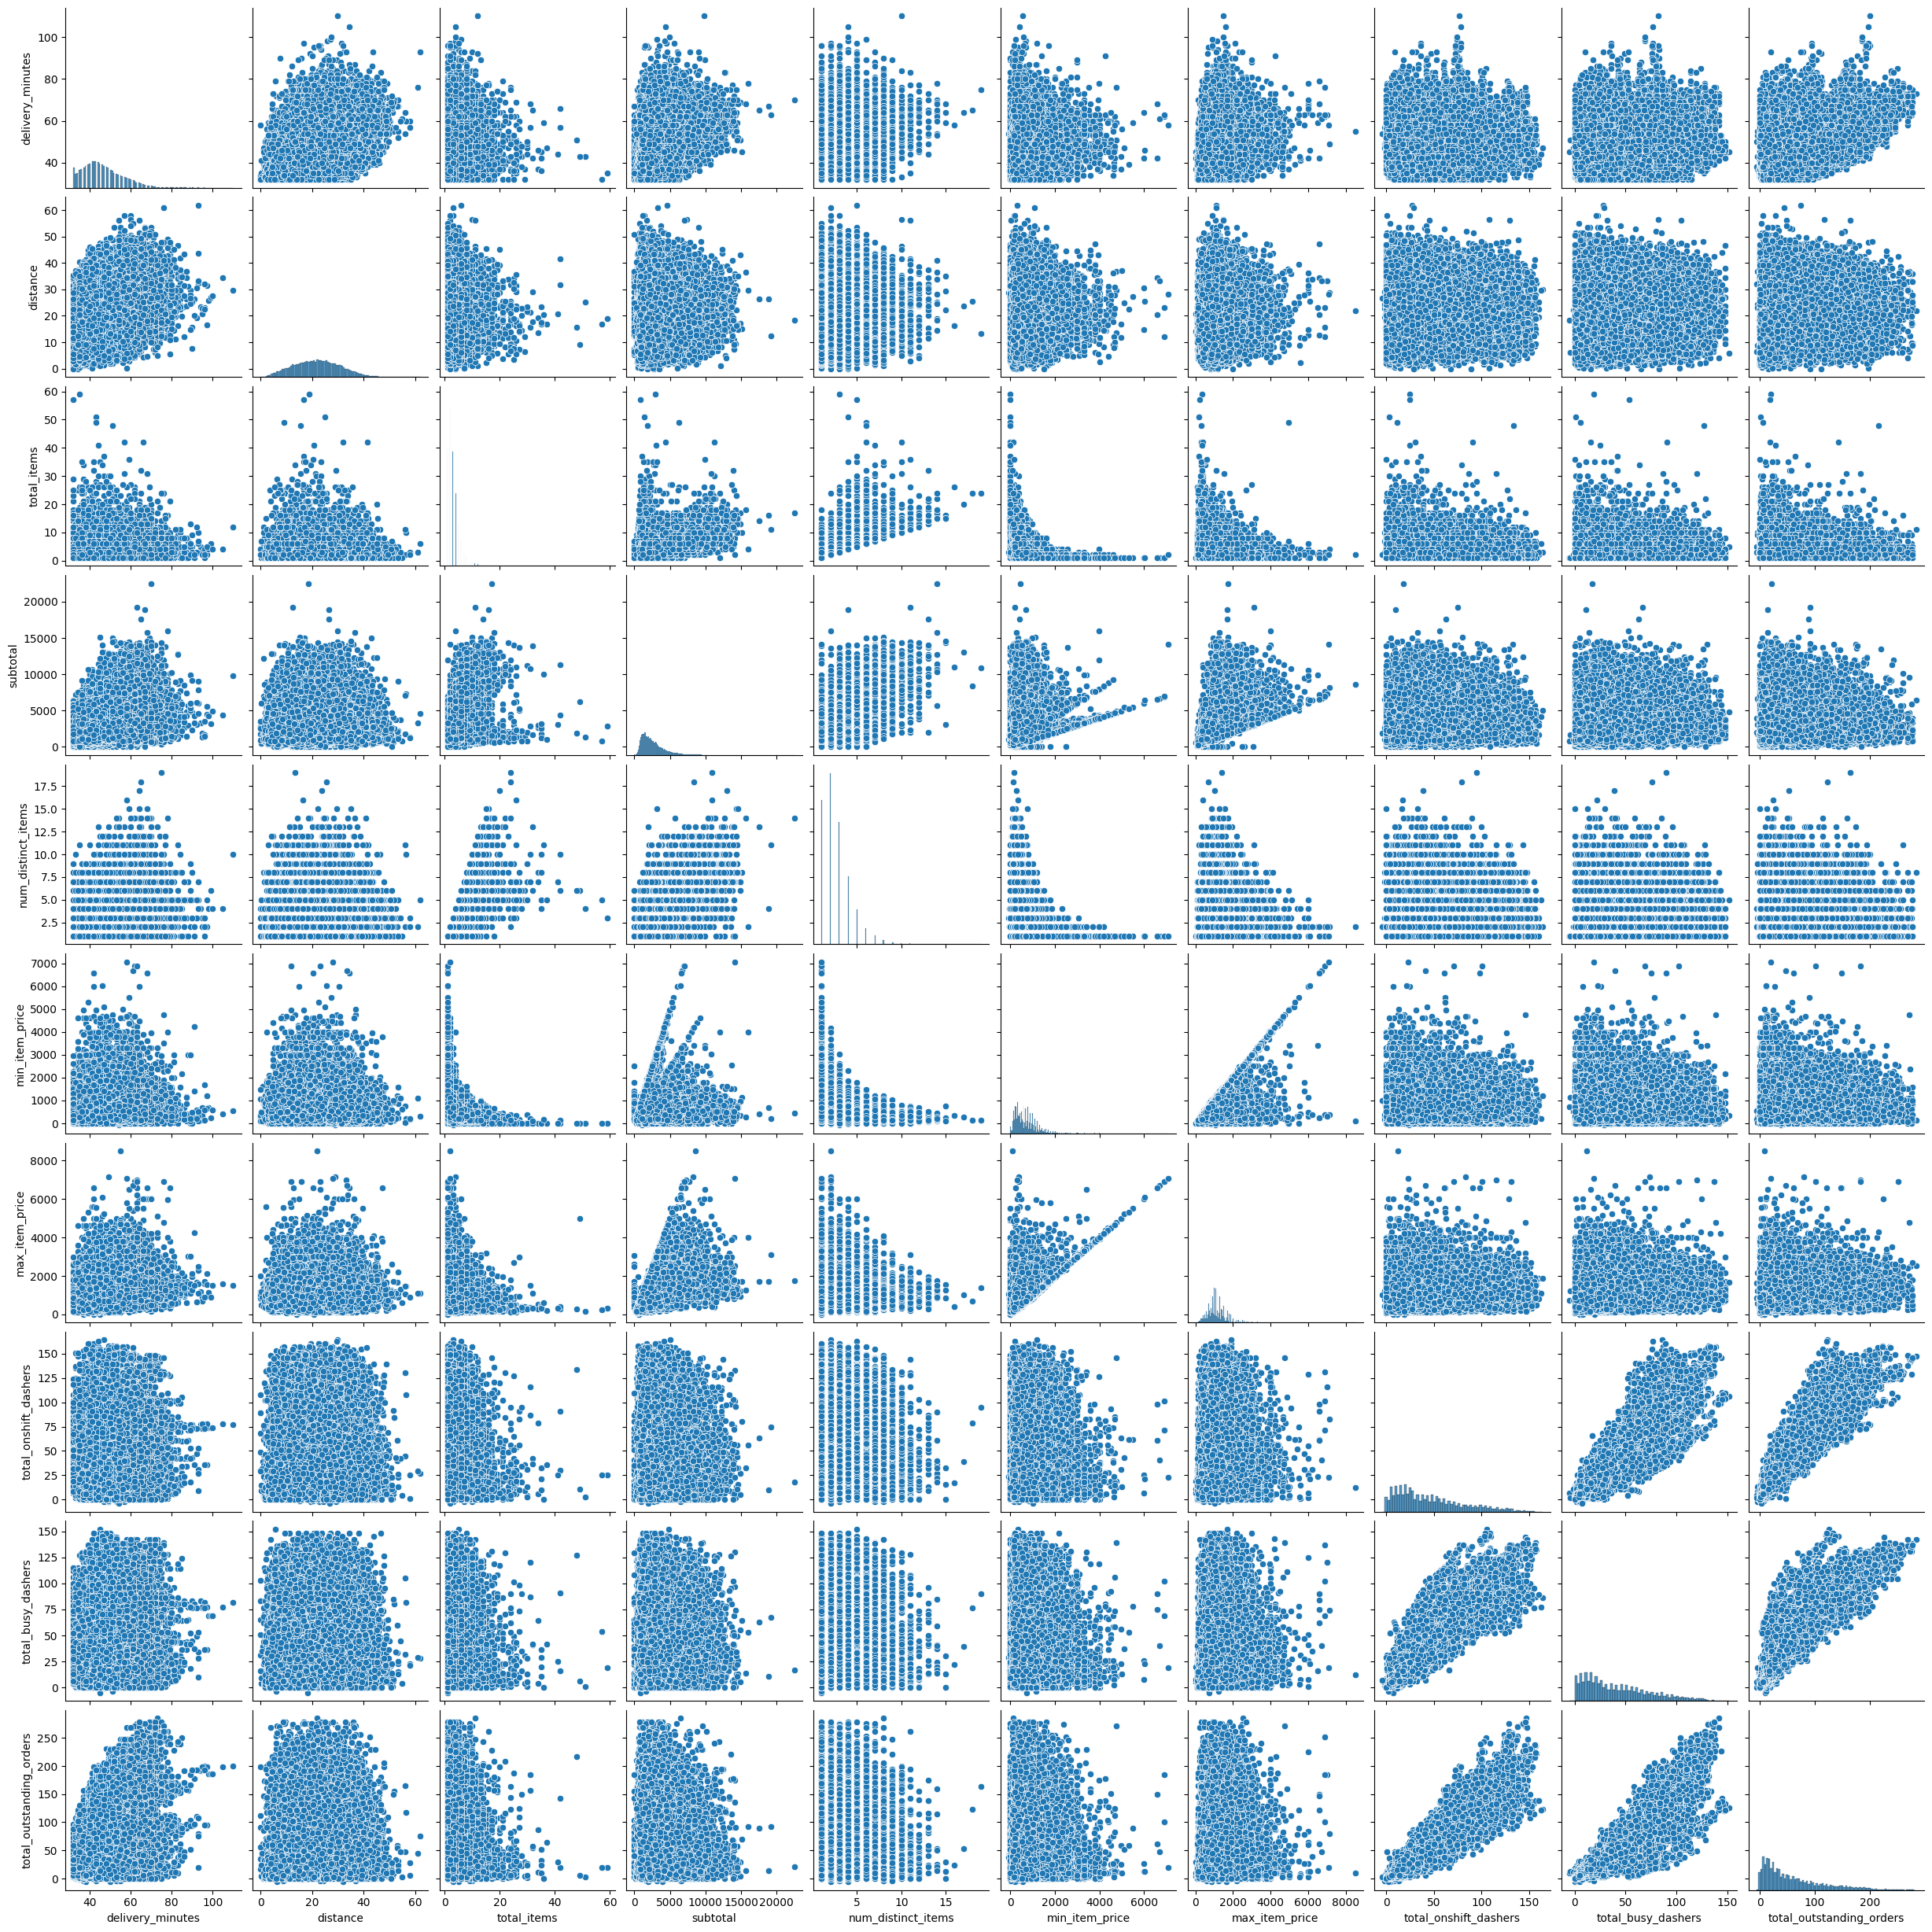

In [92]:
# Scatter plot to visualise the relationship between time_taken and other features

num_columns_dt = ['delivery_minutes','distance','total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders']

sns.pairplot(df_test[num_columns_dt])
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [94]:
# Drop the weakly correlated columns from training dataset

df_test.drop(['min_item_price', 'total_onshift_dashers', 'total_items'], axis=1, inplace=True)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [137]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [99]:
# Apply scaling to the numerical columns

train_numeric_columns = ['distance', 'subtotal', 'num_distinct_items', 
       'max_item_price', 'total_busy_dashers',
       'total_outstanding_orders', 'order_hour','delivery_minutes']
scaler = MinMaxScaler()
df_train[train_numeric_columns] = scaler.fit_transform(df_train[train_numeric_columns])


In [101]:
df_train.head()

market_id  store_primary_category  order_protocol  subtotal  \
94746         4.0                      24             5.0  0.087961   
173338        4.0                      72             5.0  0.041523   
37592         4.0                      55             5.0  0.093366   
42763         2.0                      28             4.0  0.022752   
27506         2.0                      72             1.0  0.171990   

        num_distinct_items  max_item_price  total_busy_dashers  \
94746             0.052632        0.067687            0.082278   
173338            0.000000        0.054082            0.506329   
37592             0.000000        0.081633            0.158228   
42763             0.105263        0.020340            0.575949   
27506             0.105263        0.081633            0.107595   

        total_outstanding_orders  distance  market_id_2  ...  \
94746                   0.072664  0.308904            0  ...   
173338                  0.491349  0.415753            0  ...   
37592                   0.117647  0.483562            0  ...   
42763                   0.467128  0.237671            1  ...   
27506                   0.079585  0.136986            1  ...   

        store_primary_category_72  order_protocol_2  order_protocol_3  \
94746                           0                 0                 0   
173338                          1                 0                 0   
37592                           0                 0                 0   
42763                           0                 0                 0   
27506                           1                 0                 0   

        order_protocol_4  order_protocol_5  order_protocol_6  \
94746                  0                 1                 0   
173338                 0                 1                 0   
37592                  0                 1                 0   
42763                  1                 0                 0   
27506                  0                 0                 0   

        order_protocol_7  delivery_minutes  order_hour  isWeekend  
94746                  0          0.187500    0.782609          0  
173338                 0          0.187500    0.086957          1  
37592                  0          0.250000    1.000000          1  
42763                  0          0.166667    0.043478          1  
27506                  0          0.250000    0.217391          1  

[5 rows x 95 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [105]:
# Create/Initialise the model
y_train = df_train.pop('delivery_minutes')
X_train = df_train

In [109]:
# Train the model using the training data
exclude_cols = ['market_id', 'store_primary_category', 'order_protocol']
X_train_filtered = X_train.drop(columns=exclude_cols)
X_train_sm = sm.add_constant(X_train_filtered)


In [111]:
# Make predictions
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params


const                 0.103124
subtotal              0.501165
num_distinct_items    0.191268
max_item_price        0.201151
total_busy_dashers   -1.027165
                        ...   
order_protocol_5     -0.061259
order_protocol_6     -0.028545
order_protocol_7     -0.025668
order_hour           -0.078286
isWeekend             0.032926
Length: 92, dtype: float64

In [113]:
# Find results for evaluation metrics

print (lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_minutes   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     4672.
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:38:47   Log-Likelihood:             1.2147e+05
No. Observations:              122739   AIC:                        -2.428e+05
Df Residuals:                  122647   BIC:                        -2.419e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train_filtered.columns
vif['VIF'] = [variance_inflation_factor(X_train_filtered.values, i) for i in range(X_train_filtered.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                     Features    VIF
3          total_busy_dashers  25.73
4    total_outstanding_orders  19.85
0                    subtotal  10.78
2              max_item_price  10.21
5                    distance   7.31
..                        ...    ...
11   store_primary_category_1   1.00
58  store_primary_category_48   1.00
66  store_primary_category_56   1.00
18   store_primary_category_8   1.00
32  store_primary_category_22   1.00

[91 rows x 2 columns]


In [123]:
# Will remove total busy dashers and will check again.

exclude_cols = ['market_id', 'store_primary_category', 'order_protocol','total_busy_dashers']
X_train_filtered = X_train.drop(columns=exclude_cols)
X_train_sm = sm.add_constant(X_train_filtered)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print (lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_minutes   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2356.
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:56:13   Log-Likelihood:                 91239.
No. Observations:              122739   AIC:                        -1.823e+05
Df Residuals:                  122648   BIC:                        -1.814e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train_filtered.columns
vif['VIF'] = [variance_inflation_factor(X_train_filtered.values, i) for i in range(X_train_filtered.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                     Features    VIF
0                    subtotal  10.78
2              max_item_price  10.21
4                    distance   7.31
1          num_distinct_items   5.30
3    total_outstanding_orders   4.34
..                        ...    ...
36  store_primary_category_27   1.00
73  store_primary_category_64   1.00
69  store_primary_category_60   1.00
12   store_primary_category_3   1.00
42  store_primary_category_33   1.00

[90 rows x 2 columns]


In [129]:
exclude_cols = ['market_id', 'store_primary_category', 'order_protocol','total_busy_dashers','max_item_price']
X_train_filtered = X_train.drop(columns=exclude_cols)
X_train_sm = sm.add_constant(X_train_filtered)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print (lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_minutes   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2376.
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:01:31   Log-Likelihood:                 91131.
No. Observations:              122739   AIC:                        -1.821e+05
Df Residuals:                  122649   BIC:                        -1.812e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [131]:
vif = pd.DataFrame()
vif['Features'] = X_train_filtered.columns
vif['VIF'] = [variance_inflation_factor(X_train_filtered.values, i) for i in range(X_train_filtered.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                     Features   VIF
3                    distance  7.31
0                    subtotal  7.01
2    total_outstanding_orders  4.34
1          num_distinct_items  4.33
4                 market_id_2  3.16
..                        ...   ...
64  store_primary_category_56  1.00
16   store_primary_category_8  1.00
68  store_primary_category_60  1.00
35  store_primary_category_27  1.00
51  store_primary_category_43  1.00

[89 rows x 2 columns]


In [133]:
## Most of store_primary_category_72  values are having p values greater then 0.05 barring 2,6, 17, 49. So for now removing all the store_primary_category 
exclude_cols = ['market_id', 'store_primary_category', 'order_protocol',
                'total_busy_dashers', 'max_item_price']

dummy_prefixes = ['store_primary_category_']
dummy_cols = [col for col in X_train.columns if col.startswith(tuple(dummy_prefixes))]

final_exclude = exclude_cols + dummy_cols

# Drop them and add constant
X_train_filtered = X_train.drop(columns=final_exclude)
X_train_sm = sm.add_constant(X_train_filtered)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print (lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_minutes   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.228e+04
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:12:16   Log-Likelihood:                 90620.
No. Observations:              122739   AIC:                        -1.812e+05
Df Residuals:                  122721   BIC:                        -1.810e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train_filtered.columns
vif['VIF'] = [variance_inflation_factor(X_train_filtered.values, i) for i in range(X_train_filtered.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                    Features   VIF
0                   subtotal  5.84
3                   distance  5.08
2   total_outstanding_orders  4.00
1         num_distinct_items  3.94
4                market_id_2  2.94
6                market_id_4  2.72
15                order_hour  2.08
10          order_protocol_3  2.02
12          order_protocol_5  1.84
16                 isWeekend  1.55
9           order_protocol_2  1.44
5                market_id_3  1.42
7                market_id_5  1.36
11          order_protocol_4  1.32
8                market_id_6  1.02
13          order_protocol_6  1.01
14          order_protocol_7  1.00


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [149]:
# Loop through the number of features and test the model

exclude_cols = ['market_id', 'store_primary_category', 'order_protocol']
X_train_filtered = X_train.drop(columns=exclude_cols)

lm = LinearRegression()
lm.fit(X_train_filtered, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)
print (list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
print(col)
X_train_rfe = X_train[col]


[('market_id', False, 19), ('store_primary_category', False, 86), ('order_protocol', False, 30), ('subtotal', True, 1), ('num_distinct_items', True, 1), ('max_item_price', True, 1), ('total_busy_dashers', True, 1), ('total_outstanding_orders', True, 1), ('distance', True, 1), ('market_id_2', False, 4), ('market_id_3', False, 7), ('market_id_4', False, 5), ('market_id_5', False, 61), ('market_id_6', False, 10), ('store_primary_category_1', False, 26), ('store_primary_category_2', False, 49), ('store_primary_category_3', True, 1), ('store_primary_category_4', False, 60), ('store_primary_category_5', False, 24), ('store_primary_category_6', False, 38), ('store_primary_category_7', False, 69), ('store_primary_category_8', False, 31), ('store_primary_category_9', False, 20), ('store_primary_category_10', False, 73), ('store_primary_category_11', False, 79), ('store_primary_category_12', False, 75), ('store_primary_category_13', False, 52), ('store_primary_category_14', False, 62), ('store_p

In [234]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         total_busy_dashers  22.85
4   total_outstanding_orders  19.30
0                   subtotal  10.23
2             max_item_price   7.36
1         num_distinct_items   4.70
5                   distance   4.15
6   store_primary_category_3   1.00
7  store_primary_category_56   1.00

In [240]:
exclude_cols = ['market_id', 'store_primary_category', 'order_protocol','total_busy_dashers']
X_train_filtered = X_train.drop(columns=exclude_cols)

lm = LinearRegression()
lm.fit(X_train_filtered, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train_filtered, y_train)
print (list(zip(X_train_filtered.columns,rfe.support_,rfe.ranking_)))
col = X_train_filtered.columns[rfe.support_]
print(col)
X_train_rfe = X_train_filtered[col]


[('subtotal', True, 1), ('num_distinct_items', True, 1), ('max_item_price', True, 1), ('total_outstanding_orders', True, 1), ('distance', True, 1), ('market_id_2', False, 2), ('market_id_3', False, 6), ('market_id_4', False, 3), ('market_id_5', False, 7), ('market_id_6', False, 4), ('store_primary_category_1', False, 40), ('store_primary_category_2', False, 46), ('store_primary_category_3', True, 1), ('store_primary_category_4', False, 59), ('store_primary_category_5', False, 20), ('store_primary_category_6', False, 34), ('store_primary_category_7', False, 52), ('store_primary_category_8', False, 73), ('store_primary_category_9', False, 25), ('store_primary_category_10', False, 80), ('store_primary_category_11', False, 61), ('store_primary_category_12', False, 67), ('store_primary_category_13', False, 50), ('store_primary_category_14', False, 69), ('store_primary_category_15', False, 23), ('store_primary_category_16', False, 63), ('store_primary_category_17', False, 33), ('store_primar

In [242]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   subtotal  10.23
2             max_item_price   7.26
1         num_distinct_items   4.69
4                   distance   3.99
3   total_outstanding_orders   2.40
5   store_primary_category_3   1.00
6  store_primary_category_56   1.00
7  store_primary_category_67   1.00

In [321]:
exclude_cols = ['market_id', 'store_primary_category', 'order_protocol','total_busy_dashers','subtotal']
X_train_filtered = X_train.drop(columns=exclude_cols)

lm = LinearRegression()
lm.fit(X_train_filtered, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train_filtered, y_train)
print (list(zip(X_train_filtered.columns,rfe.support_,rfe.ranking_)))
col = X_train_filtered.columns[rfe.support_]
print(col)
X_train_rfe = X_train_filtered[col]

[('num_distinct_items', True, 1), ('max_item_price', True, 1), ('total_outstanding_orders', True, 1), ('distance', True, 1), ('market_id_2', True, 1), ('market_id_3', False, 5), ('market_id_4', False, 2), ('market_id_5', False, 6), ('market_id_6', False, 4), ('store_primary_category_1', False, 45), ('store_primary_category_2', False, 42), ('store_primary_category_3', True, 1), ('store_primary_category_4', False, 51), ('store_primary_category_5', False, 14), ('store_primary_category_6', False, 39), ('store_primary_category_7', False, 46), ('store_primary_category_8', False, 53), ('store_primary_category_9', False, 25), ('store_primary_category_10', False, 78), ('store_primary_category_11', False, 69), ('store_primary_category_12', False, 62), ('store_primary_category_13', False, 48), ('store_primary_category_14', False, 71), ('store_primary_category_15', False, 22), ('store_primary_category_16', False, 56), ('store_primary_category_17', False, 32), ('store_primary_category_18', False, 6

In [323]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                   distance  4.05
1             max_item_price  3.94
2   total_outstanding_orders  2.68
0         num_distinct_items  1.96
4                market_id_2  1.58
5   store_primary_category_3  1.00
6  store_primary_category_56  1.00
7  store_primary_category_67  1.00

In [325]:
# Build the final model with selected number of features
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_minutes   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:14:21   Log-Likelihood:                 73433.
No. Observations:              122739   AIC:                        -1.468e+05
Df Residuals:                  122730   BIC:                        -1.468e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [327]:
exclude_cols = ['market_id', 'store_primary_category', 'order_protocol','total_busy_dashers','subtotal','store_primary_category_3']
X_train_filtered = X_train.drop(columns=exclude_cols)

lm = LinearRegression()
lm.fit(X_train_filtered, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train_filtered, y_train)
print (list(zip(X_train_filtered.columns,rfe.support_,rfe.ranking_)))
col = X_train_filtered.columns[rfe.support_]
print(col)
X_train_rfe = X_train_filtered[col]

[('num_distinct_items', True, 1), ('max_item_price', True, 1), ('total_outstanding_orders', True, 1), ('distance', True, 1), ('market_id_2', True, 1), ('market_id_3', False, 4), ('market_id_4', True, 1), ('market_id_5', False, 5), ('market_id_6', False, 3), ('store_primary_category_1', False, 44), ('store_primary_category_2', False, 41), ('store_primary_category_4', False, 50), ('store_primary_category_5', False, 13), ('store_primary_category_6', False, 38), ('store_primary_category_7', False, 45), ('store_primary_category_8', False, 52), ('store_primary_category_9', False, 24), ('store_primary_category_10', False, 77), ('store_primary_category_11', False, 68), ('store_primary_category_12', False, 61), ('store_primary_category_13', False, 47), ('store_primary_category_14', False, 70), ('store_primary_category_15', False, 21), ('store_primary_category_16', False, 55), ('store_primary_category_17', False, 31), ('store_primary_category_18', False, 67), ('store_primary_category_19', False,

In [329]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                   distance  4.13
1             max_item_price  3.95
2   total_outstanding_orders  3.44
4                market_id_2  2.14
5                market_id_4  1.99
0         num_distinct_items  1.97
6  store_primary_category_56  1.00
7  store_primary_category_67  1.00

In [331]:
# Build the final model with selected number of features
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_minutes   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                 1.954e+04
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:16:02   Log-Likelihood:                 80039.
No. Observations:              122739   AIC:                        -1.601e+05
Df Residuals:                  122730   BIC:                        -1.600e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [333]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


y_pred = lm.predict(X_train_rfe_lm)
residuals = y_train - y_pred


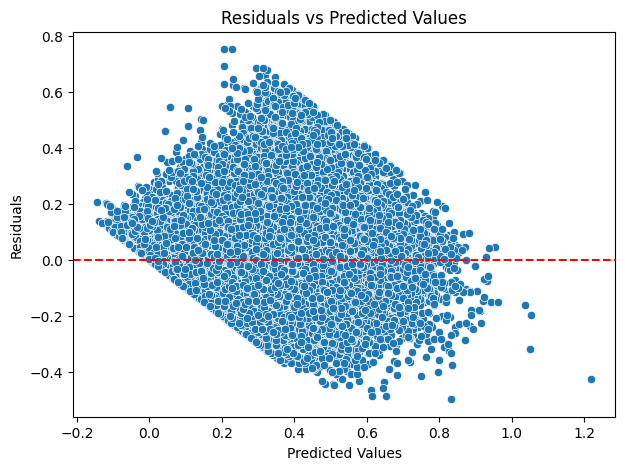

In [335]:
#Residuals vs Predicted Values
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


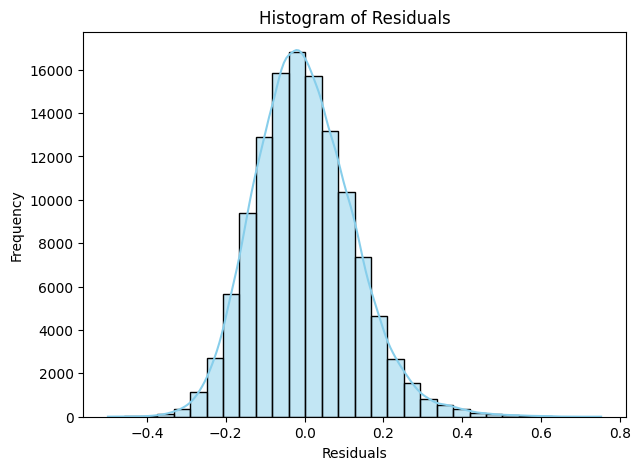

In [337]:
#Histograms of Residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


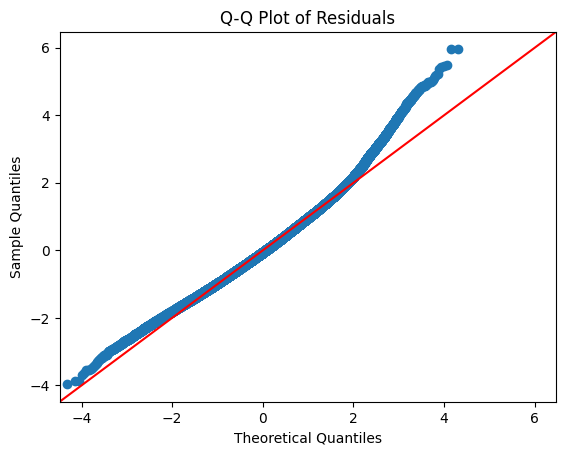

In [339]:
# Q-Q plot of Normality
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


[Your inferences here:]


#### Residuals are randomly scattered and it shows no funnel shapes.
#### A bell-shaped curve suggests normality in residual errors. Mean of error is at zero.
#### Since residuals follow the 45-degree line closely, we're in good shape. There’s some departure at the upper and lower quantiles 



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [342]:
# Creating unscalled copy of X_train


df_train_unscaled, df_test_unscaled = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train_unscaled.drop(['min_item_price', 'total_onshift_dashers', 'total_items'], axis=1, inplace=True)
df_train_unscaled = df_train_unscaled[df_train_unscaled['delivery_minutes'] <= 80]
df_train_unscaled = df_train_unscaled[df_train_unscaled['distance'] <= 60]
y_train_unscaled = df_train_unscaled.pop('delivery_minutes')
X_train_unscaled = df_train_unscaled

In [344]:
# Compare the scaled vs unscaled features used in the final model
#sm.OLS(y_train,X_train_rfe).fit() 
# Unscaled model
model_unscaled = sm.OLS(y_train, sm.add_constant(X_train_unscaled[col])).fit()

# Scaled model
model_scaled = sm.OLS(y_train, X_train_rfe_lm).fit()


In [346]:
coeffs_unscaled = pd.Series(model_unscaled.params, name='Unscaled Coefficients')
coeffs_scaled = pd.Series(model_scaled.params, name='Scaled Coefficients')

comparison_df = pd.concat([coeffs_unscaled, coeffs_scaled], axis=1)
print(comparison_df)

                           Unscaled Coefficients  Scaled Coefficients
const                                  -0.103532            -0.083714
num_distinct_items                      0.030890             0.586913
max_item_price                          0.000060             0.878615
total_outstanding_orders                0.001845             0.533319
distance                                0.009934             0.580174
market_id_2                            -0.155912            -0.155912
market_id_4                            -0.117681            -0.117681
store_primary_category_56               0.167843             0.167843
store_primary_category_67               0.128996             0.128996


In [348]:
print(model_unscaled.summary())
print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_minutes   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                 1.954e+04
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:19:56   Log-Likelihood:                 80039.
No. Observations:              122739   AIC:                        -1.601e+05
Df Residuals:                  122730   BIC:                        -1.600e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [350]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# Will do the analysis of change for distance
coeff_distamce = model_scaled.params['distance']
print (f"Coeff_distance {coeff_distamce}")
max_distance = X_train_unscaled['distance'].max()
min_distance = X_train_unscaled['distance'].min()
print (f"Mean {max_distance} and standard deviation {min_distance}")
range_distance  = max_distance - min_distance
effect_per_unit = coeff_distamce / range_distance
print (f"Range {range_distance}")
print (f"Distance effect per unit through scaled training set {effect_per_unit}")

coeff_distamce_unscaled = model_unscaled.params['distance']
print (f"Distance effect per unit through unscalled training set {coeff_distamce_unscaled}")




Coeff_distance 0.5801743618778917
Mean 58.4 and standard deviation 0.0
Range 58.4
Distance effect per unit through scaled training set 0.009934492497909106
Distance effect per unit through unscalled training set 0.009934492497908993


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

### Analysis
>- Above analysis shows that **distance variable** effect per unit for both scaled and unscaled training set are nearly same i.e. **~0.0099**. So both describe the same relationship to the traget variable delivery_mins. We will need to extrapolate the values later to come to the same scale

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>- There were four categorical variables - 'market_id', 'store_primary_category', 'order_protocol', 'isWeekend'. The first 3 were the part of the dataset and fourth one i.e. 'isWeekend' was a derived categorical variable.
>- I used RFE & VFI to remove variables and develop the above model with R2 of 0.56 using 8 features only. However, in the final model, we see that Market_id_2 , Market_id_4, store_primary_category_56 and store_primary_category_67 appear to have an impact on target variable 'delivery_minutes'. It suggest that these categorical dummies have significant effect on 'delivery_minutes', as per the given training dataset.
>- Category variable 'isWeekend' and other dummy categories associated with market_id, order_protocol, and store_primary_category might exhibit limited variation or have subtle effects that did not stand out in the model.
>- From this we can infer that the restaurants located at specific location which has market id 2 & 4 do take less delivery time as they have negative coefficients. Also, storey category belonging to 56 and 67 do give us inferences that may be food cooking takes longer time due to its category.   



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



>- It means that 20% of the data goes to testing and the remaining 80% is used to train the model.
>- This is crucial for ensuring the model gets evaluated on unseen data, helping measure how well it generalizes. For above analysis we have used test_size as 0.3, which refers 30% data as test data.




##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



>- From the heatmap, 'distance' has the highest corralation with target variable 'delivery_minutes' i.e. of 0.46



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>- We began by visualizing delivery_minutes using a boxplot to detect anomalies. Records exceeding 80 minutes were far beyond the upper bound of the distribution and likely outliers. These were removed from the dataset to prevent the model from overfitting on extreme cases. This threshold was chosen with a slight margin below the 100th percentile to ensure robustness.

>- We explored additional boxplots across other numerical variables. Given that distance showed the strongest correlation with delivery time, rows with distance > 60 were similarly removed. This helped preserve data quality and reduce skew caused by rare, long-distance orders.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>- Through Recursive Feature elimination we have found the rankings as 1 for these variable - ('num_distinct_items', True, 1), ('max_item_price', True, 1), ('total_outstanding_orders', True, 1), ('distance', True, 1), ('market_id_2', True, 1).
>- Absolute T - statistics for 'distance' , 'total_outstanding_orders', 'market_id_2' are around 241, 227, 162 respectively.
>- P-values for all above variables are near 0.
>- A larger absolute t-value = higher confidence that the feature influences the target variable 'delivery_minutes'.
>- Hence the top 3 features from the above model is - 'distance' , 'total_outstanding_orders' and 'market_id_2'
 



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>- Liner regression expression from above model is :
    delivery_minutes ≈ 
    0.5869 × num_distinct_items +
    0.8786 × max_item_price +
    0.5333 × total_outstanding_orders +
    0.5802 × distance 
   -0.1559 × market_id_2 
   -0.1177 × market_id_4 +
    0.1678 × store_primary_category_56 +
    0.1290 × store_primary_category_67 - 0.0837
>- Linear Regression is a supervised learning algorithm used to predict the target variable based on one or more input features/variables. It assumes a linear relationship between the independent variables and the target (dependent variable).
>- As highlighted in above liner regular expression the value of target variable 'delivery_minutes' is dependent on other factors which include distance, max_item_price , market_id_2 etc. This is a classic case of multiple linear regression as there are many variables throughg which we will get the the desired target variable value. '
>- With above each variable we have coefficients associated to it. It represents the estimated change in the target variable for a one-unit change in the corresponding predictor — assuming all other variables are held constant.






---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
For Simple Linear Regression :
>- It uses one independent variable to predict the dependent variable. Its equation looks like : y = B0 + B1 x ; where B0 is the intercept and B1 is the coefficient of variable. For example - predict delivery_minutes price just on the bases of distance
>-  Can be visualized in a straight line in 2D space.
>-  Less flexible; may underfit complex relationships.

 
For Multiple Linear Regression
>- It uses two or more independent variable. All above models are dependent on mutiple variable like distance,  max_item_price , market_id_2 etc.
>- Represents a hyperplane in multi-dimensional space
>- May suffer from multicollinearity, which can distort coefficient estimates





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


In linear regression, the most commonly used cost function is the Mean Squared Error (MSE). The cost function measures the difference between actual and predicted values. The goal of training the model is to find the best-fitting line — or set of coefficients — that minimizes this cost.
There are two primary methods to minimize the mean square error: Ordinary Least Squares (OLS) and Gradient Descent



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Overfitting:
> When a model learns the training data too well, including noise or random fluctuations, and performs poorly on new, unseen data. 
> Model is too complex for the dataset and it depends on too many features or parameter
> Not enough training data

Underfitting:
> When a model is too simple to capture the underlying patterns in the data, and performs poorly on both training and unseen data.
> Example: Linear model on non-linear data




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Residual plots help diagnose how well the model fits the data and whether it violates key assumptions of linear regression.
>- Residuals should be randomly scattered around 0.
>- Spread (variance) of residuals should be roughly constant across all predicted values. A funnel shape (widening or narrowing of residuals) indicates heteroscedasticity, which violates regression assumptions
>- Points with very large residuals. These may be outliers or influential points that disproportionately affect the model.
>- Various plots such as scatterplot, Histogram and QQ plot help us to view these residual error and help us to understand how these errors are distributed


